In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style()

<hr>
<h3>Series .map( ) Method</h3>

In [3]:
pokemon = pd.read_csv('..\\data\\pokemon.csv')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
pokedex = pokemon.set_index('#')['Name']

In [7]:
pokedex.head()

#
1                Bulbasaur
2                  Ivysaur
3                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [8]:
pokemon_type = pokemon.set_index('Name')['Type 1']

In [9]:
pokemon_type.head()

Name
Bulbasaur                Grass
Ivysaur                  Grass
Venusaur                 Grass
VenusaurMega Venusaur    Grass
Charmander                Fire
Name: Type 1, dtype: object

In [10]:
pokedex.map(pokemon_type)

#
1        Grass
2        Grass
3        Grass
3        Grass
4         Fire
        ...   
719       Rock
719       Rock
720    Psychic
720    Psychic
721       Fire
Name: Name, Length: 800, dtype: object

In [13]:
types = pokemon['Type 1']
types

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object

In [16]:
pokedex.map(types)

#
1      NaN
2      NaN
3      NaN
3      NaN
4      NaN
      ... 
719    NaN
719    NaN
720    NaN
720    NaN
721    NaN
Name: Name, Length: 800, dtype: object

<hr>
<h3>The .nsmalest( ) and .nlargest( ) Methods</h3>

In [18]:
bond = pd.read_csv('..//data/jamesbond.csv', index_col = 'Film')
bond.sort_index(inplace = True)

In [19]:
bond.head()

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1
Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3
Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN
Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
Die Another Day,2002,Pierce Brosnan,Lee Tamahori,465.4,154.2,17.9


In [20]:
bond.nlargest(3, columns = 'Bond Actor Salary')

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Die Another Day,2002,Pierce Brosnan,Lee Tamahori,465.4,154.2,17.9
Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
The World Is Not Enough,1999,Pierce Brosnan,Michael Apted,439.5,158.3,13.5


In [21]:
bond['Bond Actor Salary'].max()

17.9

In [22]:
bond.nsmallest(3, columns = 'Bond Actor Salary')

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6


In [23]:
bond['Budget'].nlargest(5)

Film
Spectre                    206.3
Quantum of Solace          181.4
Skyfall                    170.2
The World Is Not Enough    158.3
Die Another Day            154.2
Name: Budget, dtype: float64

<hr>
<h1>Working with Text Data</h1>

In [24]:
chicago = pd.read_csv('../data/chicago.csv')

In [25]:
chicago.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,"$90,744.00"
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,"$84,450.00"
2,"AARON, KARINA",POLICE OFFICER,POLICE,"$84,450.00"
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,"$89,880.00"
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,"$106,836.00"


In [26]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32062 entries, 0 to 32061
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    32062 non-null  object
 1     Position Title        32062 non-null  object
 2   Department              32062 non-null  object
 3   Employee Annual Salary  32062 non-null  object
dtypes: object(4)
memory usage: 1002.1+ KB


In [27]:
chicago.nunique()

Name                      31776
  Position Title           1093
Department                   35
Employee Annual Salary     1156
dtype: int64

In [29]:
chicago.columns

Index(['Name', '  Position Title', 'Department  ', 'Employee Annual Salary'], dtype='object')

In [30]:
chicago['Department  '] = chicago['Department  '].astype('category')

In [31]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32062 entries, 0 to 32061
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Name                    32062 non-null  object  
 1     Position Title        32062 non-null  object  
 2   Department              32062 non-null  category
 3   Employee Annual Salary  32062 non-null  object  
dtypes: category(1), object(3)
memory usage: 784.2+ KB


In [32]:
chicago.tail()

,Name,Position Title,Department,Employee Annual Salary
32057,"ZYGADLO, MICHAEL J",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,"$99,528.00"
32058,"ZYGOWICZ, PETER J",POLICE OFFICER,POLICE,"$87,384.00"
32059,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,"$84,450.00"
32060,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,"$87,384.00"
32061,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,"$113,664.00"


In [33]:
chicago.dropna(how = 'all', inplace = True)

In [34]:
chicago.tail()

,Name,Position Title,Department,Employee Annual Salary
32057,"ZYGADLO, MICHAEL J",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,"$99,528.00"
32058,"ZYGOWICZ, PETER J",POLICE OFFICER,POLICE,"$87,384.00"
32059,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,"$84,450.00"
32060,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,"$87,384.00"
32061,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,"$113,664.00"


In [35]:
chicago['Name'].str.lower()

0            aaron,  elvia j
1          aaron,  jeffery m
2             aaron,  karina
3        aaron,  kimberlei r
4        abad jr,  vicente m
                ...         
32057    zygadlo,  michael j
32058     zygowicz,  peter j
32059      zymantas,  mark e
32060    zyrkowski,  carlo e
32061    zyskowski,  dariusz
Name: Name, Length: 32062, dtype: object

In [36]:
chicago['Name'].str.upper()

0            AARON,  ELVIA J
1          AARON,  JEFFERY M
2             AARON,  KARINA
3        AARON,  KIMBERLEI R
4        ABAD JR,  VICENTE M
                ...         
32057    ZYGADLO,  MICHAEL J
32058     ZYGOWICZ,  PETER J
32059      ZYMANTAS,  MARK E
32060    ZYRKOWSKI,  CARLO E
32061    ZYSKOWSKI,  DARIUSZ
Name: Name, Length: 32062, dtype: object

In [37]:
chicago['Name'].str.title()

0            Aaron,  Elvia J
1          Aaron,  Jeffery M
2             Aaron,  Karina
3        Aaron,  Kimberlei R
4        Abad Jr,  Vicente M
                ...         
32057    Zygadlo,  Michael J
32058     Zygowicz,  Peter J
32059      Zymantas,  Mark E
32060    Zyrkowski,  Carlo E
32061    Zyskowski,  Dariusz
Name: Name, Length: 32062, dtype: object

In [38]:
chicago['Name'].str.len()

0        15
1        17
2        14
3        19
4        19
         ..
32057    19
32058    18
32059    17
32060    19
32061    19
Name: Name, Length: 32062, dtype: int64

In [40]:
chicago['  Position Title'] = chicago['  Position Title'].str.title() 

In [41]:
chicago.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",Water Rate Taker,WATER MGMNT,"$90,744.00"
1,"AARON, JEFFERY M",Police Officer,POLICE,"$84,450.00"
2,"AARON, KARINA",Police Officer,POLICE,"$84,450.00"
3,"AARON, KIMBERLEI R",Chief Contract Expediter,GENERAL SERVICES,"$89,880.00"
4,"ABAD JR, VICENTE M",Civil Engineer Iv,WATER MGMNT,"$106,836.00"


In [42]:
chicago.columns

Index(['Name', '  Position Title', 'Department  ', 'Employee Annual Salary'], dtype='object')

In [44]:
chicago['Department  ']

0             WATER MGMNT
1                  POLICE
2                  POLICE
3        GENERAL SERVICES
4             WATER MGMNT
               ...       
32057    GENERAL SERVICES
32058              POLICE
32059              POLICE
32060              POLICE
32061                DoIT
Name: Department  , Length: 32062, dtype: category
Categories (35, object): ['ADMIN HEARNG', 'ANIMAL CONTRL', 'AVIATION', 'BOARD OF ELECTION', ..., 'STREETS & SAN', 'TRANSPORTN', 'TREASURER', 'WATER MGMNT']

In [45]:
chicago['Department  '].str.replace('MGMNT', 'MANAGEMENT')

0        WATER MANAGEMENT
1                  POLICE
2                  POLICE
3        GENERAL SERVICES
4        WATER MANAGEMENT
               ...       
32057    GENERAL SERVICES
32058              POLICE
32059              POLICE
32060              POLICE
32061                DoIT
Name: Department  , Length: 32062, dtype: object

In [46]:
chicago['Department  '] = chicago['Department  '].str.replace('MGMNT', 'MANAGEMENT')

In [47]:
chicago['Employee Annual Salary'].str.replace('$', '')

<ipython-input-47-27e5a1533d17>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chicago['Employee Annual Salary'].str.replace('$', '')


0         90,744.00
1         84,450.00
2         84,450.00
3         89,880.00
4        106,836.00
            ...    
32057     99,528.00
32058     87,384.00
32059     84,450.00
32060     87,384.00
32061    113,664.00
Name: Employee Annual Salary, Length: 32062, dtype: object

In [48]:
chicago['Employee Annual Salary'].str.replace('$', '', regex = False) 

0         90,744.00
1         84,450.00
2         84,450.00
3         89,880.00
4        106,836.00
            ...    
32057     99,528.00
32058     87,384.00
32059     84,450.00
32060     87,384.00
32061    113,664.00
Name: Employee Annual Salary, Length: 32062, dtype: object

In [ ]:
chicago['Employee Annual Salary'].str.replace('$', '', regex = False).astype(float)

In [50]:
chicago['Employee Annual Salary'].str.replace('$', '', regex = False).str.replace(',', '', regex = False).astype(float)

0         90744.0
1         84450.0
2         84450.0
3         89880.0
4        106836.0
           ...   
32057     99528.0
32058     87384.0
32059     84450.0
32060     87384.0
32061    113664.0
Name: Employee Annual Salary, Length: 32062, dtype: float64

In [51]:
s = chicago['Employee Annual Salary'].str.replace('$', '', regex = False).str.replace(',', '', regex = False).astype(float)
chicago['Employee Annual Salary'] = s

In [52]:
chicago.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",Water Rate Taker,WATER MANAGEMENT,90744.0
1,"AARON, JEFFERY M",Police Officer,POLICE,84450.0
2,"AARON, KARINA",Police Officer,POLICE,84450.0
3,"AARON, KIMBERLEI R",Chief Contract Expediter,GENERAL SERVICES,89880.0
4,"ABAD JR, VICENTE M",Civil Engineer Iv,WATER MANAGEMENT,106836.0


In [53]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32062 entries, 0 to 32061
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    32062 non-null  object 
 1     Position Title        32062 non-null  object 
 2   Department              32062 non-null  object 
 3   Employee Annual Salary  32062 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [54]:
chicago['Employee Annual Salary'].mean()

80204.178633899

<hr>
<h2>Filtering with String Methods</h2>

In [55]:
chicago['  Position Title'].str.contains('WATER')

0        False
1        False
2        False
3        False
4        False
         ...  
32057    False
32058    False
32059    False
32060    False
32061    False
Name:   Position Title, Length: 32062, dtype: bool

In [57]:
chicago['  Position Title'].str.contains('WATER').sum()

0

In [59]:
chicago['  Position Title'].head()

0            Water Rate Taker
1              Police Officer
2              Police Officer
3    Chief Contract Expediter
4           Civil Engineer Iv
Name:   Position Title, dtype: object

In [61]:
chicago['  Position Title'].str.lower().str.contains('water')

0         True
1        False
2        False
3        False
4        False
         ...  
32057    False
32058    False
32059    False
32060    False
32061    False
Name:   Position Title, Length: 32062, dtype: bool

In [63]:
mask.sum()

111

In [65]:
(chicago['  Position Title'].str.lower().str.count('water')).sum()

111

In [62]:
mask = chicago['  Position Title'].str.lower().str.contains('water')
chicago[mask]

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",Water Rate Taker,WATER MANAGEMENT,90744.0
554,"ALUISE, VINCENT G",Foreman Of Water Pipe Construction,WATER MANAGEMENT,102440.0
671,"ANDER, PERRY A",Water Chemist Ii,WATER MANAGEMENT,82044.0
685,"ANDERSON, ANDREW J",District Superintendent Of Water Distribution,WATER MANAGEMENT,109272.0
702,"ANDERSON, DONALD",Foreman Of Water Pipe Construction,WATER MANAGEMENT,102440.0
...,...,...,...,...
29669,"VERMA, ANUPAM",Managing Engineer - Water Management,WATER MANAGEMENT,111192.0
30239,"WASHINGTON, JOSEPH",Water Chemist Iii,WATER MANAGEMENT,89676.0
30544,"WEST, THOMAS R",Gen Supt Of Water Management,WATER MANAGEMENT,115704.0
30991,"WILLIAMS, MATTHEW",Foreman Of Water Pipe Construction,WATER MANAGEMENT,102440.0


In [66]:
chicago['  Position Title'].str.lower().str.startswith('water')

0         True
1        False
2        False
3        False
4        False
         ...  
32057    False
32058    False
32059    False
32060    False
32061    False
Name:   Position Title, Length: 32062, dtype: bool

In [67]:
mask = chicago['  Position Title'].str.lower().str.startswith('water')
chicago[mask]

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",Water Rate Taker,WATER MANAGEMENT,90744.0
671,"ANDER, PERRY A",Water Chemist Ii,WATER MANAGEMENT,82044.0
1054,"ASHLEY, KARMA T",Water Chemist Ii,WATER MANAGEMENT,82044.0
1079,"ATKINS, JOANNA M",Water Chemist Ii,WATER MANAGEMENT,82044.0
1181,"AZEEM, MOHAMMED A",Water Chemist Ii,WATER MANAGEMENT,53172.0
...,...,...,...,...
28574,"THREATT, DENISE R",Water Quality Inspector,WATER MANAGEMENT,62004.0
28602,"TIGNOR, DARRYL B",Water Rate Taker,WATER MANAGEMENT,78948.0
28955,"TRAVIS COOK, LESLIE R",Water Rate Taker,WATER MANAGEMENT,78948.0
29584,"VELAZQUEZ, JOHN",Water Rate Taker,WATER MANAGEMENT,78948.0


In [68]:
chicago['  Position Title'].str.lower().str.endswith('ist')

0        False
1        False
2        False
3        False
4        False
         ...  
32057    False
32058    False
32059    False
32060    False
32061    False
Name:   Position Title, Length: 32062, dtype: bool

In [69]:
mask = chicago['  Position Title'].str.lower().str.endswith('ist')
chicago[mask]

,Name,Position Title,Department,Employee Annual Salary
184,"AFROZ, NAYYAR",Psychiatrist,HEALTH,99840.0
308,"ALARCON, LUIS J",Loan Processing Specialist,COMMUNITY DEVELOPMENT,81948.0
422,"ALLAIN, CAROLYN",Senior Telecommunications Specialist,DoIT,89880.0
472,"ALLEN, ROBERT",Machinist,WATER MANAGEMENT,94328.0
705,"ANDERSON, EDWARD M",Sr Procurement Specialist,PROCUREMENT,91476.0
...,...,...,...,...
31667,"YODER, TERESA G",Archival Specialist,PUBLIC LIBRARY,74304.0
31688,"YOUNGBLOOM, LAURENCE G",Crimes Surveillance Specialist,OEMC,19676.8
31717,"YOUNG, KIMBERLY M",Sr Procurement Specialist,PROCUREMENT,68556.0
31837,"ZAPATA, HUGO",Sr Procurement Specialist,PROCUREMENT,87324.0


In [70]:
'water' in 'Foreman Of Water Pipe Construction'.lower()

True

In [74]:
'Foreman Of Water Pipe Construction'.lower()[-len('water'):]

'ction'

In [73]:
'water' == 'Foreman Of Water Pipe Construction'.lower()[-len('water'):]

False

<hr>
<h2>.strip( ), .lstrip( ) and .rstrip( ) Methods</h2>

In [75]:
'      Hellow  World  '.lstrip()

'Hellow  World  '

In [76]:
'      Hellow  World  '.rstrip()

'      Hellow  World'

In [83]:
'_'.join('      Hellow     World  '.split())

'Hellow_World'

In [84]:
'      Hellow World  '.strip()

'Hellow World'

In [85]:
chicago['Name'].str.strip()

0            AARON,  ELVIA J
1          AARON,  JEFFERY M
2             AARON,  KARINA
3        AARON,  KIMBERLEI R
4        ABAD JR,  VICENTE M
                ...         
32057    ZYGADLO,  MICHAEL J
32058     ZYGOWICZ,  PETER J
32059      ZYMANTAS,  MARK E
32060    ZYRKOWSKI,  CARLO E
32061    ZYSKOWSKI,  DARIUSZ
Name: Name, Length: 32062, dtype: object

In [86]:
chicago = pd.read_csv('../data/chicago.csv', index_col = 'Name')

In [87]:
chicago.dropna(how = 'all', inplace = True)

In [88]:
chicago.head()

,Position Title,Department,Employee Annual Salary
Name,,,
"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,"$90,744.00"
"AARON, JEFFERY M",POLICE OFFICER,POLICE,"$84,450.00"
"AARON, KARINA",POLICE OFFICER,POLICE,"$84,450.00"
"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,"$89,880.00"
"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,"$106,836.00"


In [90]:
type(chicago.columns)

pandas.core.indexes.base.Index

In [89]:
chicago.columns

Index(['  Position Title', 'Department  ', 'Employee Annual Salary'], dtype='object')

In [91]:
chicago.columns.str.strip()

Index(['Position Title', 'Department', 'Employee Annual Salary'], dtype='object')

In [92]:
chicago.columns = chicago.columns.str.strip()

In [93]:
chicago.columns

Index(['Position Title', 'Department', 'Employee Annual Salary'], dtype='object')

In [94]:
chicago.index

Index(['AARON,  ELVIA J', 'AARON,  JEFFERY M', 'AARON,  KARINA',
       'AARON,  KIMBERLEI R', 'ABAD JR,  VICENTE M', 'ABARCA,  ANABEL',
       'ABARCA,  EMMANUEL', 'ABASCAL,  REECE E', 'ABBASI,  CHRISTOPHER',
       'ABBATACOLA,  ROBERT J',
       ...
       'ZWIT,  JEFFREY J', 'ZWOLFER,  MATTHEW W', 'ZYCH,  MATEUSZ',
       'ZYDEK,  BRYAN', 'ZYGADLO,  JOHN P', 'ZYGADLO,  MICHAEL J',
       'ZYGOWICZ,  PETER J', 'ZYMANTAS,  MARK E', 'ZYRKOWSKI,  CARLO E',
       'ZYSKOWSKI,  DARIUSZ'],
      dtype='object', name='Name', length=32062)

In [101]:
chicago.index.str.title().str.split().str.join(' ')

Index(['Aaron, Elvia J', 'Aaron, Jeffery M', 'Aaron, Karina',
       'Aaron, Kimberlei R', 'Abad Jr, Vicente M', 'Abarca, Anabel',
       'Abarca, Emmanuel', 'Abascal, Reece E', 'Abbasi, Christopher',
       'Abbatacola, Robert J',
       ...
       'Zwit, Jeffrey J', 'Zwolfer, Matthew W', 'Zych, Mateusz',
       'Zydek, Bryan', 'Zygadlo, John P', 'Zygadlo, Michael J',
       'Zygowicz, Peter J', 'Zymantas, Mark E', 'Zyrkowski, Carlo E',
       'Zyskowski, Dariusz'],
      dtype='object', name='Name', length=32062)

In [102]:
chicago.index = chicago.index.str.title().str.split().str.join(' ')

In [103]:
chicago.head()

,Position Title,Department,Employee Annual Salary
Name,,,
"Aaron, Elvia J",WATER RATE TAKER,WATER MGMNT,"$90,744.00"
"Aaron, Jeffery M",POLICE OFFICER,POLICE,"$84,450.00"
"Aaron, Karina",POLICE OFFICER,POLICE,"$84,450.00"
"Aaron, Kimberlei R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,"$89,880.00"
"Abad Jr, Vicente M",CIVIL ENGINEER IV,WATER MGMNT,"$106,836.00"


In [106]:
chicago.loc['Aaron, Elvia J']

Position Title            WATER RATE TAKER
Department                     WATER MGMNT
Employee Annual Salary          $90,744.00
Name: Aaron, Elvia J, dtype: object

In [107]:
for c in chicago.columns:
    chicago[c] = chicago[c].str.title().str.split().str.join(' ')
    
chicago.head()

,Position Title,Department,Employee Annual Salary
Name,,,
"Aaron, Elvia J",Water Rate Taker,Water Mgmnt,"$90,744.00"
"Aaron, Jeffery M",Police Officer,Police,"$84,450.00"
"Aaron, Karina",Police Officer,Police,"$84,450.00"
"Aaron, Kimberlei R",Chief Contract Expediter,General Services,"$89,880.00"
"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,"$106,836.00"


In [112]:
type(chicago['Department'].dtype)

numpy.dtype

<hr>
<h2>.split( ) Method</h2>

In [113]:
chicago.reset_index(inplace = True)

In [114]:
chicago['Name']

0            Aaron, Elvia J
1          Aaron, Jeffery M
2             Aaron, Karina
3        Aaron, Kimberlei R
4        Abad Jr, Vicente M
                ...        
32057    Zygadlo, Michael J
32058     Zygowicz, Peter J
32059      Zymantas, Mark E
32060    Zyrkowski, Carlo E
32061    Zyskowski, Dariusz
Name: Name, Length: 32062, dtype: object

In [117]:
chicago['Name'].str.split(',')

0            [Aaron,  Elvia J]
1          [Aaron,  Jeffery M]
2             [Aaron,  Karina]
3        [Aaron,  Kimberlei R]
4        [Abad Jr,  Vicente M]
                 ...          
32057    [Zygadlo,  Michael J]
32058     [Zygowicz,  Peter J]
32059      [Zymantas,  Mark E]
32060    [Zyrkowski,  Carlo E]
32061    [Zyskowski,  Dariusz]
Name: Name, Length: 32062, dtype: object

In [118]:
chicago['Name'].str.split(',')[0]

['Aaron', ' Elvia J']

In [125]:
chicago['Name'].str.split(',').str.get(1).str.split().str.get(0)

0            Elvia
1          Jeffery
2           Karina
3        Kimberlei
4          Vicente
           ...    
32057      Michael
32058        Peter
32059         Mark
32060        Carlo
32061      Dariusz
Name: Name, Length: 32062, dtype: object

<hr>
<h1>MultiIndex</h1>

In [126]:
data = pd.read_csv('..//data/bigmac.csv', parse_dates = ['Date'])

In [127]:
data.head()

,Date,Country,Price in US Dollars
0,2016-01-01,Argentina,2.39
1,2016-01-01,Australia,3.74
2,2016-01-01,Brazil,3.35
3,2016-01-01,Britain,4.22
4,2016-01-01,Canada,4.14


In [128]:
data.tail()

,Date,Country,Price in US Dollars
647,2010-01-01,Turkey,3.83
648,2010-01-01,UAE,2.99
649,2010-01-01,Ukraine,1.83
650,2010-01-01,United States,3.58
651,2010-01-01,Uruguay,3.32


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 652 non-null    datetime64[ns]
 1   Country              652 non-null    object        
 2   Price in US Dollars  652 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.4+ KB


**MultiIndex**

In [130]:
data.set_index(['Date', 'Country'])

Price in US Dollars
Date       Country                           
2016-01-01 Argentina                     2.39
           Australia                     3.74
           Brazil                        3.35
           Britain                       4.22
           Canada                        4.14
...                                       ...
2010-01-01 Turkey                        3.83
           UAE                           2.99
           Ukraine                       1.83
           United States                 3.58
           Uruguay                       3.32

[652 rows x 1 columns]

In [131]:
data.set_index(['Country', 'Date'])

,,Price in US Dollars
Country,Date,
Argentina,2016-01-01,2.39
Australia,2016-01-01,3.74
Brazil,2016-01-01,3.35
Britain,2016-01-01,4.22
Canada,2016-01-01,4.14
...,...,...
Turkey,2010-01-01,3.83
UAE,2010-01-01,2.99
Ukraine,2010-01-01,1.83


In [132]:
data.nunique()

Date                    12
Country                 58
Price in US Dollars    330
dtype: int64

In [133]:
data.set_index(['Date', 'Country'], inplace = True)

In [134]:
data.head()

Price in US Dollars
Date       Country                       
2016-01-01 Argentina                 2.39
           Australia                 3.74
           Brazil                    3.35
           Britain                   4.22
           Canada                    4.14

In [135]:
data.sort_index()

Price in US Dollars
Date       Country                           
2010-01-01 Argentina                     1.84
           Australia                     3.98
           Brazil                        4.76
           Britain                       3.67
           Canada                        3.97
...                                       ...
2016-01-01 Ukraine                       1.54
           United States                 4.93
           Uruguay                       3.74
           Venezuela                     0.66
           Vietnam                       2.67

[652 rows x 1 columns]

In [136]:
data.sort_index(ascending = [True, False])

Price in US Dollars
Date       Country                           
2010-01-01 Uruguay                       3.32
           United States                 3.58
           Ukraine                       1.83
           UAE                           2.99
           Turkey                        3.83
...                                       ...
2016-01-01 Brazil                        3.35
           Belgium                       4.25
           Austria                       3.76
           Australia                     3.74
           Argentina                     2.39

[652 rows x 1 columns]

In [137]:
data.sort_index(level = 'Date')

Price in US Dollars
Date       Country                           
2010-01-01 Argentina                     1.84
           Australia                     3.98
           Brazil                        4.76
           Britain                       3.67
           Canada                        3.97
...                                       ...
2016-01-01 Ukraine                       1.54
           United States                 4.93
           Uruguay                       3.74
           Venezuela                     0.66
           Vietnam                       2.67

[652 rows x 1 columns]

In [138]:
data.sort_index(level = 1)

,,Price in US Dollars
Date,Country,
2010-01-01,Argentina,1.84
2010-07-01,Argentina,3.56
2011-07-01,Argentina,4.84
2012-01-01,Argentina,4.64
2012-07-01,Argentina,4.16
...,...,...
2014-01-01,Vietnam,2.84
2014-07-01,Vietnam,2.83
2015-01-01,Vietnam,2.81


In [139]:
data.sort_index(inplace = True)

In [140]:
data.index

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Date', 'Country'], length=652)

In [141]:
data.index[0]

(Timestamp('2010-01-01 00:00:00'), 'Argentina')

In [142]:
data.index.names

FrozenList(['Date', 'Country'])

In [143]:
data = pd.read_csv('..//data/bigmac.csv', parse_dates = ['Date'], index_col = ['Date', 'Country'])
data.sort_index(inplace = True)

In [144]:
data.head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

<hr>
<h3>.get_level_values( ) Method</h3>

In [145]:
data.index

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Date', 'Country'], length=652)

In [146]:
data.index.names

FrozenList(['Date', 'Country'])

In [147]:
data.index.get_level_values('Date')

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Date', length=652, freq=None)

In [148]:
data.index.get_level_values(0)

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Date', length=652, freq=None)

In [149]:
data.index.get_level_values('Country')

Index(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Czech Republic',
       ...
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine',
       'United States', 'Uruguay', 'Venezuela', 'Vietnam'],
      dtype='object', name='Country', length=652)

In [150]:
data.index.get_level_values(1)

Index(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Czech Republic',
       ...
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine',
       'United States', 'Uruguay', 'Venezuela', 'Vietnam'],
      dtype='object', name='Country', length=652)

<hr>
<h3>.set_names( ) Method</h3>

In [151]:
data.head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [152]:
data.index

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Date', 'Country'], length=652)

In [153]:
data.index.set_names(names = ['Day', 'Location'])

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Day', 'Location'], length=652)

In [154]:
data.index.set_names(names = ['Day', 'Location'], inplace = True)

In [155]:
data.index

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Day', 'Location'], length=652)

In [156]:
data.head()

Price in US Dollars
Day        Location                      
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [157]:
data.index.set_names(names = 'Date', level = 'Day')

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Date', 'Location'], length=652)

In [158]:
data.index.set_names(names = 'Date', level = 0)

MultiIndex([('2010-01-01',      'Argentina'),
            ('2010-01-01',      'Australia'),
            ('2010-01-01',         'Brazil'),
            ('2010-01-01',        'Britain'),
            ('2010-01-01',         'Canada'),
            ('2010-01-01',          'Chile'),
            ('2010-01-01',          'China'),
            ('2010-01-01',       'Colombia'),
            ('2010-01-01',     'Costa Rica'),
            ('2010-01-01', 'Czech Republic'),
            ...
            ('2016-01-01',    'Switzerland'),
            ('2016-01-01',         'Taiwan'),
            ('2016-01-01',       'Thailand'),
            ('2016-01-01',         'Turkey'),
            ('2016-01-01',            'UAE'),
            ('2016-01-01',        'Ukraine'),
            ('2016-01-01',  'United States'),
            ('2016-01-01',        'Uruguay'),
            ('2016-01-01',      'Venezuela'),
            ('2016-01-01',        'Vietnam')],
           names=['Date', 'Location'], length=652)

In [159]:
data.index.set_names(names = 'Date', level = 'Day', inplace = True)

In [160]:
data.head()

Price in US Dollars
Date       Location                      
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

<hr>
<h3>Extract Rows from a MultiIdex DataFrame</h3>

In [161]:
data = pd.read_csv('..//data/bigmac.csv', parse_dates = ['Date'], index_col = ['Date', 'Country'])
data.sort_index(inplace = True)

In [162]:
data.head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [163]:
data.loc['2010-01-01']

Price in US Dollars
Date       Country                            
2010-01-01 Argentina                      1.84
           Australia                      3.98
           Brazil                         4.76
           Britain                        3.67
           Canada                         3.97
           Chile                          3.18
           China                          1.83
           Colombia                       3.91
           Costa Rica                     3.52
           Czech Republic                 3.71
           Denmark                        5.99
           Egypt                          2.38
           Euro area                      4.84
           Hong Kong                      1.91
           Hungary                        3.86
           Indonesia                      2.24
           Israel                         3.99
           Japan                          3.50
           Latvia                         3.09
           Lithuania                      2.87
           Malaysia                       2.08
           Mexico                         2.50
           New Zealand                    3.61
           Norway                         7.02
           Pakistan                       2.42
           Peru                           2.81
           Philippines                    2.21
           Poland                         2.86
           Russia                         2.34
           Saudi Arabia                   2.67
           Singapore                      3.19
           South Africa                   2.46
           South Korea                    2.98
           Sri Lanka                      1.83
           Sweden                         5.51
           Switzerland                    6.30
           Taiwan                         2.36
           Thailand                       2.11
           Turkey                         3.83
           UAE                            2.99
           Ukraine                        1.83
           United States                  3.58
           Uruguay                        3.32

In [164]:
data.loc['2010-01-01', 'Argentina']

Price in US Dollars    1.84
Name: (2010-01-01 00:00:00, Argentina), dtype: float64

In [165]:
data.loc['2010-01-01', 'Price in US Dollars']

Date        Country       
2010-01-01  Argentina         1.84
            Australia         3.98
            Brazil            4.76
            Britain           3.67
            Canada            3.97
            Chile             3.18
            China             1.83
            Colombia          3.91
            Costa Rica        3.52
            Czech Republic    3.71
            Denmark           5.99
            Egypt             2.38
            Euro area         4.84
            Hong Kong         1.91
            Hungary           3.86
            Indonesia         2.24
            Israel            3.99
            Japan             3.50
            Latvia            3.09
            Lithuania         2.87
            Malaysia          2.08
            Mexico            2.50
            New Zealand       3.61
            Norway            7.02
            Pakistan          2.42
            Peru              2.81
            Philippines       2.21
            Poland          

In [166]:
data.loc[('2010-01-01', 'Argentina'), 'Price in US Dollars']

Date        Country  
2010-01-01  Argentina    1.84
Name: Price in US Dollars, dtype: float64

In [167]:
data.loc[['2010-01-01', 'Argentina'], 'Price in US Dollars']

KeyError: "['2010-01-01' 'Argentina'] not in index"

In [168]:
data.loc[('2010-01-01', :)]

SyntaxError: invalid syntax (<ipython-input-168-519c0a5d503a>, line 1)

In [169]:
data.loc[('2010-01-01', )]

,Price in US Dollars
Country,
Argentina,1.84
Australia,3.98
Brazil,4.76
Britain,3.67
Canada,3.97
Chile,3.18
China,1.83
Colombia,3.91
Costa Rica,3.52


In [170]:
data.head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [171]:
data.iloc[0]

Price in US Dollars    1.84
Name: (2010-01-01 00:00:00, Argentina), dtype: float64

<hr>
<h3>The .swaplevel( ) Method</h3>

In [172]:
data = pd.read_csv('..//data/bigmac.csv', parse_dates = ['Date'], index_col = ['Date', 'Country'])
data.sort_index(inplace = True)

In [173]:
data.head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [174]:
data.swaplevel()

,,Price in US Dollars
Country,Date,
Argentina,2010-01-01,1.84
Australia,2010-01-01,3.98
Brazil,2010-01-01,4.76
Britain,2010-01-01,3.67
Canada,2010-01-01,3.97
...,...,...
Ukraine,2016-01-01,1.54
United States,2016-01-01,4.93
Uruguay,2016-01-01,3.74


In [175]:
data.swaplevel('Date', 'Country')

,,Price in US Dollars
Country,Date,
Argentina,2010-01-01,1.84
Australia,2010-01-01,3.98
Brazil,2010-01-01,4.76
Britain,2010-01-01,3.67
Canada,2010-01-01,3.97
...,...,...
Ukraine,2016-01-01,1.54
United States,2016-01-01,4.93
Uruguay,2016-01-01,3.74


In [176]:
data.swaplevel('Country', 'Date')

,,Price in US Dollars
Country,Date,
Argentina,2010-01-01,1.84
Australia,2010-01-01,3.98
Brazil,2010-01-01,4.76
Britain,2010-01-01,3.67
Canada,2010-01-01,3.97
...,...,...
Ukraine,2016-01-01,1.54
United States,2016-01-01,4.93
Uruguay,2016-01-01,3.74


<hr>
<h3>The .stack( ) Method</h3>

In [177]:
data = pd.read_csv('..\\data\\worldstats.csv')

In [178]:
data.head()

,country,year,Population,GDP
0,Arab World,2015,392022276.0,2.530102e+12
1,Arab World,2014,384222592.0,2.873600e+12
2,Arab World,2013,376504253.0,2.846994e+12
3,Arab World,2012,368802611.0,2.773270e+12
4,Arab World,2011,361031820.0,2.497945e+12


In [179]:
data = pd.read_csv('..\\data\\worldstats.csv', index_col = ['country', 'year'])

In [180]:
data.head()

Population           GDP
country    year                           
Arab World 2015  392022276.0  2.530102e+12
           2014  384222592.0  2.873600e+12
           2013  376504253.0  2.846994e+12
           2012  368802611.0  2.773270e+12
           2011  361031820.0  2.497945e+12

In [181]:
data.stack()

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
                                    ...     
Zimbabwe    1962  GDP           1.117602e+09
            1961  Population    3.876638e+06
                  GDP           1.096647e+09
            1960  Population    3.752390e+06
                  GDP           1.052990e+09
Length: 22422, dtype: float64

In [182]:
data.stack().index

MultiIndex([('Arab World', 2015, 'Population'),
            ('Arab World', 2015,        'GDP'),
            ('Arab World', 2014, 'Population'),
            ('Arab World', 2014,        'GDP'),
            ('Arab World', 2013, 'Population'),
            ('Arab World', 2013,        'GDP'),
            ('Arab World', 2012, 'Population'),
            ('Arab World', 2012,        'GDP'),
            ('Arab World', 2011, 'Population'),
            ('Arab World', 2011,        'GDP'),
            ...
            (  'Zimbabwe', 1964, 'Population'),
            (  'Zimbabwe', 1964,        'GDP'),
            (  'Zimbabwe', 1963, 'Population'),
            (  'Zimbabwe', 1963,        'GDP'),
            (  'Zimbabwe', 1962, 'Population'),
            (  'Zimbabwe', 1962,        'GDP'),
            (  'Zimbabwe', 1961, 'Population'),
            (  'Zimbabwe', 1961,        'GDP'),
            (  'Zimbabwe', 1960, 'Population'),
            (  'Zimbabwe', 1960,        'GDP')],
           names=['coun

In [183]:
s = data.stack()

In [184]:
type(s)

pandas.core.series.Series

In [185]:
s.to_frame()

0
country    year                         
Arab World 2015 Population  3.920223e+08
                GDP         2.530102e+12
           2014 Population  3.842226e+08
                GDP         2.873600e+12
           2013 Population  3.765043e+08
...                                  ...
Zimbabwe   1962 GDP         1.117602e+09
           1961 Population  3.876638e+06
                GDP         1.096647e+09
           1960 Population  3.752390e+06
                GDP         1.052990e+09

[22422 rows x 1 columns]

In [186]:
pd.DataFrame(s)

0
country    year                         
Arab World 2015 Population  3.920223e+08
                GDP         2.530102e+12
           2014 Population  3.842226e+08
                GDP         2.873600e+12
           2013 Population  3.765043e+08
...                                  ...
Zimbabwe   1962 GDP         1.117602e+09
           1961 Population  3.876638e+06
                GDP         1.096647e+09
           1960 Population  3.752390e+06
                GDP         1.052990e+09

[22422 rows x 1 columns]

<hr>
<h3>The .unstack( ) Method</h3>

In [187]:
s.unstack()

Population           GDP
country     year                          
Afghanistan 1960   8994793.0  5.377778e+08
            1961   9164945.0  5.488889e+08
            1962   9343772.0  5.466667e+08
            1963   9531555.0  7.511112e+08
            1964   9728645.0  8.000000e+08
...                      ...           ...
Zimbabwe    2011  14255592.0  1.095623e+10
            2012  14565482.0  1.239272e+10
            2013  14898092.0  1.349023e+10
            2014  15245855.0  1.419691e+10
            2015  15602751.0  1.389294e+10

[11211 rows x 2 columns]

In [190]:
s.unstack().unstack()

Population                                            \
year                        1960          1961          1962          1963   
country                                                                      
Afghanistan         8.994793e+06  9.164945e+06  9.343772e+06  9.531555e+06   
Albania                      NaN           NaN           NaN           NaN   
Algeria             1.112489e+07  1.140486e+07  1.169015e+07  1.198513e+07   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               3.035056e+09  3.076121e+09  3.129064e+09  3.193947e+09   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              3.049586e+06  3.142848e+06  3.240664e+06  3.342894e+06   
Zimbabwe            3.752390e+06  3.876638e+06  4.006262e+06  4.140804e+06   

                                                                            \
year                        1964          1965          1966          1967   
country                                                                      
Afghanistan         9.728645e+06  9.935358e+06  1.014884e+07  1.036860e+07   
Albania                      NaN           NaN           NaN           NaN   
Algeria             1.229597e+07  1.262695e+07  1.298027e+07  1.335420e+07   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               3.259355e+09  3.326054e+09  3.395866e+09  3.465297e+09   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              3.449266e+06  3.559687e+06  3.674088e+06  3.792864e+06   
Zimbabwe            4.279561e+06  4.422132e+06  4.568320e+06  4.718612e+06   

                                                ...           GDP  \
year                        1968          1969  ...          2006   
country                                         ...                 
Afghanistan         1.059979e+07  1.084951e+07  ...  7.057598e+09   
Albania                      NaN           NaN  ...  8.992642e+09   
Algeria             1.374438e+07  1.414444e+07  ...  1.170273e+11   
Andorra                      NaN           NaN  ...  3.536452e+09   
Angola                       NaN           NaN  ...  4.178948e+10   
...                          ...           ...  ...           ...   
West Bank and Gaza           NaN           NaN  ...  4.910100e+09   
World               3.535512e+09  3.609910e+09  ...  5.107451e+13   
Yemen, Rep.                  NaN           NaN  ...  1.908173e+10   
Zambia              3.916928e+06  4.047479e+06  ...  1.275686e+10   
Zimbabwe            4.874113e+06  5.036321e+06  ...  5.443896e+09   

                                                                            \
year                        2007          2008          2009          2010   
country                                                                      
Afghanistan         9.843842e+09  1.019053e+10  1.248694e+10  1.593680e+10   
Albania             1.070101e+10  1.288135e+10  1.204421e+10  1.192695e+10   
Algeria             1.349771e+11  1.710007e+11  1.372110e+11  1.612073e+11   
Andorra             4.010785e+09  4.001349e+09  3.649863e+09  3.346317e+09   
Angola              6.044892e+10  8.417803e+10  7.549238e+10  8.247091e+10   
...                          ...           ...           ...           ...   
West Bank and Gaza  5.505800e+09  6.673500e+09  7.268200e+09  8.913100e+09   
World               5.758343e+13  6.312856e+13  5.983553e+13  6.564782e+13   
Yemen, Rep.

In [191]:
s.unstack().unstack().unstack()

            year  country           
Population  1960  Afghanistan           8.994793e+06
                  Albania                        NaN
                  Algeria               1.112489e+07
                  Andorra                        NaN
                  Angola                         NaN
                                            ...     
GDP         2015  West Bank and Gaza    1.267740e+10
                  World                 7.343364e+13
                  Yemen, Rep.                    NaN
                  Zambia                2.120156e+10
                  Zimbabwe              1.389294e+10
Length: 28224, dtype: float64

In [192]:
s.head()

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
dtype: float64

In [197]:
s.head()

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
dtype: float64

In [198]:
s.unstack(2)

Population           GDP
country     year                          
Afghanistan 1960   8994793.0  5.377778e+08
            1961   9164945.0  5.488889e+08
            1962   9343772.0  5.466667e+08
            1963   9531555.0  7.511112e+08
            1964   9728645.0  8.000000e+08
...                      ...           ...
Zimbabwe    2011  14255592.0  1.095623e+10
            2012  14565482.0  1.239272e+10
            2013  14898092.0  1.349023e+10
            2014  15245855.0  1.419691e+10
            2015  15602751.0  1.389294e+10

[11211 rows x 2 columns]

In [199]:
s.unstack(1)

year                            1960          1961          1962  \
country                                                            
Afghanistan Population  8.994793e+06  9.164945e+06  9.343772e+06   
            GDP         5.377778e+08  5.488889e+08  5.466667e+08   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.112489e+07  1.140486e+07  1.169015e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.049586e+06  3.142848e+06  3.240664e+06   
            GDP         6.987397e+08  6.823597e+08  6.792797e+08   
Zimbabwe    Population  3.752390e+06  3.876638e+06  4.006262e+06   
            GDP         1.052990e+09  1.096647e+09  1.117602e+09   

year                            1963          1964          1965  \
country                                                            
Afghanistan Population  9.531555e+06  9.728645e+06  9.935358e+06   
            GDP         7.511112e+08  8.000000e+08  1.006667e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.198513e+07  1.229597e+07  1.262695e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.342894e+06  3.449266e+06  3.559687e+06   
            GDP         7.043397e+08  8.226397e+08  1.061200e+09   
Zimbabwe    Population  4.140804e+06  4.279561e+06  4.422132e+06   
            GDP         1.159512e+09  1.217138e+09  1.311436e+09   

year                            1966          1967          1968  \
country                                                            
Afghanistan Population  1.014884e+07  1.036860e+07  1.059979e+07   
            GDP         1.400000e+09  1.673333e+09  1.373333e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.298027e+07  1.335420e+07  1.374438e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.674088e+06  3.792864e+06  3.916928e+06   
            GDP         1.239000e+09  1.340639e+09  1.573739e+09   
Zimbabwe    Population  4.568320e+06  4.718612e+06  4.874113e+06   
            GDP         1.281750e+09  1.397002e+09  1.479600e+09   

year                            1969  ...          2006          2007  \
country                               ...                               
Afghanistan Population  1.084951e+07  ...  2.518362e+07  2.587754e+07   
            GDP         1.408889e+09  ...  7.057598e+09  9.843842e+09   
Albania     Population           NaN  ...  2.992547e+06  2.970017e+06   
            GDP                  NaN  ...  8.992642e+09  1.070101e+10   
Algeria     Population  1.414444e+07  ...  3.374933e+07  3.426197e+07   
...                              ...  ...           ...           ...   
Yemen, Rep. GDP                  NaN  ...  1.908173e+10  2.563367e+10   
Zambia      Population  4.047479e+06  ...  1.238151e+07  1.273868e+07   
            GDP         1.926399e+09  ...  1.275686e+10  1.405696e+10   
Zimbabwe    Population  5.036321e+06  ...  1.312794e+07  1.329780e+07   
            GDP         1.747999e+09  ...  5.443896e+09  5.291950e+09   

year                            2008          2009          2010  \
country                                                            
Afghanistan Population  2.652874e+07  2.720729e+07  2.796221e+07   
            GDP         1.019053e+10  1.248694e+10  1.593680e+10   
Albania     Population  2.947314e+06  2.927519e+06  2.913021e+06   
            GDP         1.288135e+10  1.204421e+10  1.1

In [200]:
s.unstack(0)

country           Afghanistan       Albania       Algeria       Andorra  \
year                                                                      
1960 Population  8.994793e+06           NaN  1.112489e+07           NaN   
     GDP         5.377778e+08           NaN  2.723638e+09           NaN   
1961 Population  9.164945e+06           NaN  1.140486e+07           NaN   
     GDP         5.488889e+08           NaN  2.434767e+09           NaN   
1962 Population  9.343772e+06           NaN  1.169015e+07           NaN   
...                       ...           ...           ...           ...   
2013 GDP         2.004633e+10  1.278103e+10  2.097035e+11  3.249101e+09   
2014 Population  3.162751e+07  2.893654e+06  3.893433e+07           NaN   
     GDP         2.005019e+10  1.327796e+10  2.135185e+11           NaN   
2015 Population  3.252656e+07  2.889167e+06  3.966652e+07           NaN   
     GDP         1.919944e+10  1.145560e+10  1.668386e+11           NaN   

country                Angola  Antigua and Barbuda    Arab World  \
year                                                               
1960 Population           NaN                  NaN           NaN   
     GDP                  NaN                  NaN           NaN   
1961 Population           NaN                  NaN           NaN   
     GDP                  NaN                  NaN           NaN   
1962 Population           NaN                  NaN           NaN   
...                       ...                  ...           ...   
2013 GDP         1.249121e+11         1.200588e+09  2.846994e+12   
2014 Population  2.422752e+07         9.090000e+04  3.842226e+08   
     GDP         1.267751e+11         1.220976e+09  2.873600e+12   
2015 Population  2.502197e+07         9.181800e+04  3.920223e+08   
     GDP         1.026431e+11         1.297285e+09  2.530102e+12   

country             Argentina       Armenia  Aruba  ...    Uzbekistan  \
year                                                ...                 
1960 Population           NaN           NaN    NaN  ...           NaN   
     GDP                  NaN           NaN    NaN  ...           NaN   
1961 Population           NaN           NaN    NaN  ...           NaN   
     GDP                  NaN           NaN    NaN  ...           NaN   
1962 Population  2.128768e+07           NaN    NaN  ...           NaN   
...                       ...           ...    ...  ...           ...   
2013 GDP         6.239320e+11  1.112147e+10    NaN  ...  5.679566e+10   
2014 Population  4.298003e+07  3.006154e+06    NaN  ...  3.075770e+07   
     GDP         5.480549e+11  1.164444e+10    NaN  ...  6.313285e+10   
2015 Population           NaN  3.017712e+06    NaN  ...  3.129950e+07   
     GDP                  NaN  1.056140e+10    NaN  ...  6.673280e+10   

country               Vanuatu  Venezuela, RB       Vietnam  \
year                                                         
1960 Population           NaN   8.146845e+06           NaN   
     GDP                  NaN   8.607600e+09           NaN   
1961 Population           NaN   8.461684e+06           NaN   
     GDP                  NaN   8.923367e+09           NaN   
1962 Population           NaN   8.790590e+06           NaN   
...                       ...            ...           ...   
2013 GDP         8.017876e+08   3.713366e+11  1.712220e+11   
2014 Population  2.588830e+05            NaN  9.072890e+07   
     GDP         8.149546e+08            NaN  1.862047e+11   
2015 Population           NaN            NaN  9.170380e+07   
     GDP                  NaN            NaN  1.935994e+11   

country          Virgin Islands (U.S.)  West Bank and Gaza         World  \
year                                                                       
1960 Population                32000.0                 NaN  3.035056e+09   
     GDP                    24200000.0                 NaN  1.364643e+12   
1961 Population                34100.0                 NaN  3.076121e+09   
  

In [201]:
s.unstack(-1)#2

Population           GDP
country     year                          
Afghanistan 1960   8994793.0  5.377778e+08
            1961   9164945.0  5.488889e+08
            1962   9343772.0  5.466667e+08
            1963   9531555.0  7.511112e+08
            1964   9728645.0  8.000000e+08
...                      ...           ...
Zimbabwe    2011  14255592.0  1.095623e+10
            2012  14565482.0  1.239272e+10
            2013  14898092.0  1.349023e+10
            2014  15245855.0  1.419691e+10
            2015  15602751.0  1.389294e+10

[11211 rows x 2 columns]

In [202]:
s.unstack(-2)#1

year                            1960          1961          1962  \
country                                                            
Afghanistan Population  8.994793e+06  9.164945e+06  9.343772e+06   
            GDP         5.377778e+08  5.488889e+08  5.466667e+08   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.112489e+07  1.140486e+07  1.169015e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.049586e+06  3.142848e+06  3.240664e+06   
            GDP         6.987397e+08  6.823597e+08  6.792797e+08   
Zimbabwe    Population  3.752390e+06  3.876638e+06  4.006262e+06   
            GDP         1.052990e+09  1.096647e+09  1.117602e+09   

year                            1963          1964          1965  \
country                                                            
Afghanistan Population  9.531555e+06  9.728645e+06  9.935358e+06   
            GDP         7.511112e+08  8.000000e+08  1.006667e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.198513e+07  1.229597e+07  1.262695e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.342894e+06  3.449266e+06  3.559687e+06   
            GDP         7.043397e+08  8.226397e+08  1.061200e+09   
Zimbabwe    Population  4.140804e+06  4.279561e+06  4.422132e+06   
            GDP         1.159512e+09  1.217138e+09  1.311436e+09   

year                            1966          1967          1968  \
country                                                            
Afghanistan Population  1.014884e+07  1.036860e+07  1.059979e+07   
            GDP         1.400000e+09  1.673333e+09  1.373333e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.298027e+07  1.335420e+07  1.374438e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.674088e+06  3.792864e+06  3.916928e+06   
            GDP         1.239000e+09  1.340639e+09  1.573739e+09   
Zimbabwe    Population  4.568320e+06  4.718612e+06  4.874113e+06   
            GDP         1.281750e+09  1.397002e+09  1.479600e+09   

year                            1969  ...          2006          2007  \
country                               ...                               
Afghanistan Population  1.084951e+07  ...  2.518362e+07  2.587754e+07   
            GDP         1.408889e+09  ...  7.057598e+09  9.843842e+09   
Albania     Population           NaN  ...  2.992547e+06  2.970017e+06   
            GDP                  NaN  ...  8.992642e+09  1.070101e+10   
Algeria     Population  1.414444e+07  ...  3.374933e+07  3.426197e+07   
...                              ...  ...           ...           ...   
Yemen, Rep. GDP                  NaN  ...  1.908173e+10  2.563367e+10   
Zambia      Population  4.047479e+06  ...  1.238151e+07  1.273868e+07   
            GDP         1.926399e+09  ...  1.275686e+10  1.405696e+10   
Zimbabwe    Population  5.036321e+06  ...  1.312794e+07  1.329780e+07   
            GDP         1.747999e+09  ...  5.443896e+09  5.291950e+09   

year                            2008          2009          2010  \
country                                                            
Afghanistan Population  2.652874e+07  2.720729e+07  2.796221e+07   
            GDP         1.019053e+10  1.248694e+10  1.593680e+10   
Albania     Population  2.947314e+06  2.927519e+06  2.913021e+06   
            GDP         1.288135e+10  1.204421e+10  1.1

In [214]:
s.unstack(-7)#0

IndexError: Too many levels: Index has only 3 levels, -7 is not a valid level number

In [206]:
s.index.names

FrozenList(['country', 'year', None])

In [207]:
l = [1, 2, 3, 4]

In [209]:
l[2]

3

In [213]:
l[4]

IndexError: list index out of range

In [205]:
s.index.names[-1]

'country'

In [215]:
s.head()

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
dtype: float64

In [216]:
s.unstack(level = [1, 0])

year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
country,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Population,3.920223e+08,3.842226e+08,3.765043e+08,3.688026e+08,3.610318e+08,3.531122e+08,3.450542e+08,3.368865e+08,3.287666e+08,3.209067e+08,...,5.036321e+06,4.874113e+06,4.718612e+06,4.568320e+06,4.422132e+06,4.279561e+06,4.140804e+06,4.006262e+06,3.876638e+06,3.752390e+06
GDP,2.530102e+12,2.873600e+12,2.846994e+12,2.773270e+12,2.497945e+12,2.103825e+12,1.798878e+12,2.081343e+12,1.641666e+12,1.404190e+12,...,1.747999e+09,1.479600e+09,1.397002e+09,1.281750e+09,1.311436e+09,1.217138e+09,1.159512e+09,1.117602e+09,1.096647e+09,1.052990e+09


In [217]:
s.unstack(level = ['country', 'year']) #not implace 

country       Arab World                                            \
year                2015          2014          2013          2012   
Population  3.920223e+08  3.842226e+08  3.765043e+08  3.688026e+08   
GDP         2.530102e+12  2.873600e+12  2.846994e+12  2.773270e+12   

country                                                             \
year                2011          2010          2009          2008   
Population  3.610318e+08  3.531122e+08  3.450542e+08  3.368865e+08   
GDP         2.497945e+12  2.103825e+12  1.798878e+12  2.081343e+12   

country                                 ...      Zimbabwe                \
year                2007          2006  ...          1969          1968   
Population  3.287666e+08  3.209067e+08  ...  5.036321e+06  4.874113e+06   
GDP         1.641666e+12  1.404190e+12  ...  1.747999e+09  1.479600e+09   

country                                                             \
year                1967          1966          1965          1964   
Population  4.718612e+06  4.568320e+06  4.422132e+06  4.279561e+06   
GDP         1.397002e+09  1.281750e+09  1.311436e+09  1.217138e+09   

country                                                             
year                1963          1962          1961          1960  
Population  4.140804e+06  4.006262e+06  3.876638e+06  3.752390e+06  
GDP         1.159512e+09  1.117602e+09  1.096647e+09  1.052990e+09  

[2 rows x 11211 columns]

<hr>
<h3>The .pivot( ) Method</h3>

In [218]:
data = pd.read_csv('..\\data\\salesmen.csv', parse_dates = ['Date'])

In [219]:
data.head()

,Date,Salesman,Revenue
0,2016-01-01,Bob,7172
1,2016-01-02,Bob,6362
2,2016-01-03,Bob,5982
3,2016-01-04,Bob,7917
4,2016-01-05,Bob,7837


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1830 non-null   datetime64[ns]
 1   Salesman  1830 non-null   object        
 2   Revenue   1830 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 43.0+ KB


In [221]:
data['Salesman'].value_counts()

Ronald    366
Dave      366
Jeb       366
Bob       366
Oscar     366
Name: Salesman, dtype: int64

In [222]:
data['Salesman'] = data['Salesman'].astype('category')

In [223]:
data.head()

,Date,Salesman,Revenue
0,2016-01-01,Bob,7172
1,2016-01-02,Bob,6362
2,2016-01-03,Bob,5982
3,2016-01-04,Bob,7917
4,2016-01-05,Bob,7837


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1830 non-null   datetime64[ns]
 1   Salesman  1830 non-null   category      
 2   Revenue   1830 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 30.7 KB


In [225]:
data.pivot(index = 'Date', columns = 'Salesman', values = 'Revenue')

Salesman,Bob,Dave,Jeb,Oscar,Ronald
Date,,,,,
2016-01-01,7172,1864,4430,5250,2639
2016-01-02,6362,8278,8026,8661,4951
2016-01-03,5982,4226,5188,7075,2703
2016-01-04,7917,3868,3144,2524,4258
2016-01-05,7837,2287,938,2793,7771
...,...,...,...,...,...
2016-12-27,2045,2843,6666,835,2981
2016-12-28,100,8888,1243,3073,6129
2016-12-29,4115,9490,3498,6424,7662


<hr>
<h3>The .pivot_table( ) Method</h3>

In [226]:
data = pd.read_csv('..\\data\\foods.csv')

In [227]:
data.head()

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49


In [228]:
data.pivot_table(values = 'Spend', index = 'Gender', aggfunc = 'mean')

,Spend
Gender,
Female,50.709629
Male,49.397623


In [229]:
data.pivot_table(values = 'Spend', index = 'Gender', aggfunc = 'sum')

,Spend
Gender,
Female,25963.33
Male,24106.04


In [230]:
data.pivot_table(values = 'Spend', index = 'Item', aggfunc = 'sum')

,Spend
Item,
Burger,7765.73
Burrito,8270.44
Chalupa,7644.52
Donut,8758.76
Ice Cream,8886.99
Sushi,8742.93


In [231]:
data.pivot_table(values = 'Spend', index = ['Gender', 'Item'], aggfunc = 'sum')

Spend
Gender Item              
Female Burger     4094.30
       Burrito    4257.82
       Chalupa    4152.26
       Donut      4743.00
       Ice Cream  4032.87
       Sushi      4683.08
Male   Burger     3671.43
       Burrito    4012.62
       Chalupa    3492.26
       Donut      4015.76
       Ice Cream  4854.12
       Sushi      4059.85

In [232]:
data.pivot_table(values = 'Spend', index = ['Gender', 'Item'], columns = 'City', aggfunc = 'sum')

City              New York  Philadelphia  Stamford
Gender Item                                       
Female Burger      1239.04       1639.24   1216.02
       Burrito      978.95       1458.76   1820.11
       Chalupa      876.58       1673.33   1602.35
       Donut       1446.78       1639.26   1656.96
       Ice Cream   1521.62       1479.22   1032.03
       Sushi       1480.29       1742.88   1459.91
Male   Burger      1294.09        938.18   1439.16
       Burrito     1399.40       1312.93   1300.29
       Chalupa     1227.77       1114.23   1150.26
       Donut       1345.27       1249.36   1421.13
       Ice Cream   1603.63       2191.27   1059.22
       Sushi       1396.15       1395.88   1267.82

In [233]:
data.pivot_table(values = 'Spend', index = ['Gender', 'Item'], columns = 'City', aggfunc = 'count')

City              New York  Philadelphia  Stamford
Gender Item                                       
Female Burger           24            31        27
       Burrito          23            28        34
       Chalupa          19            32        25
       Donut            31            30        34
       Ice Cream        27            32        22
       Sushi            31            30        32
Male   Burger           22            21        31
       Burrito          25            30        28
       Chalupa          25            23        23
       Donut            30            33        29
       Ice Cream        29            41        25
       Sushi            27            28        18

In [234]:
data.pivot_table(values = 'Spend', index = ['Gender', 'Item'], columns = 'City', aggfunc = 'max')

City              New York  Philadelphia  Stamford
Gender Item                                       
Female Burger        98.96         97.79     85.06
       Burrito       92.25         96.79     99.21
       Chalupa       98.43         99.29     98.78
       Donut         95.63         96.52     91.75
       Ice Cream     97.83         88.14     97.44
       Sushi         99.51         99.02     95.43
Male   Burger        90.32         99.68     97.20
       Burrito       98.04         93.27     95.07
       Chalupa       96.44         98.40     99.87
       Donut         86.70         93.12     99.26
       Ice Cream     97.65         99.24     99.17
       Sushi         93.85         97.12     98.48

<hr>
<h1>Groupby</h1>

In [235]:
data = pd.read_csv('..\\data\\fortune1000.csv', index_col = 'Rank')

In [236]:
data.head()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [237]:
data.tail()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
996,New York Community Bancorp,Financials,Commercial Banks,"Westbury, NY",1902,-47,3448
997,Portland General Electric,Energy,Utilities: Gas and Electric,"Portland, OR",1898,172,2646
997,Portland General Electric,Energy,Utilities: Gas and Electric,"Portland, OR",1898,172,2646
999,Wendy’s,"Hotels, Resturants & Leisure",Food Services,"Dublin, OH",1896,161,21200
1000,Briggs & Stratton,Industrials,Industrial Machinery,"Wauwatosa, WI",1895,46,5480


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    1000 non-null   object
 1   Sector     1000 non-null   object
 2   Industry   1000 non-null   object
 3   Location   1000 non-null   object
 4   Revenue    1000 non-null   int64 
 5   Profits    1000 non-null   int64 
 6   Employees  1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


In [239]:
data.groupby('Sector')

In [240]:
sectors = data.groupby('Sector')

In [241]:
type(data)

pandas.core.frame.DataFrame

In [242]:
type(sectors)

pandas.core.groupby.generic.DataFrameGroupBy

In [243]:
len(sectors)#number of groups

21

In [244]:
data['Sector'].nunique()

21

In [245]:
sectors.size()

Sector
Aerospace & Defense              20
Apparel                          15
Business Services                51
Chemicals                        30
Energy                          122
Engineering & Construction       26
Financials                      139
Food and Drug Stores             15
Food, Beverages & Tobacco        43
Health Care                      75
Hotels, Resturants & Leisure     25
Household Products               28
Industrials                      46
Materials                        43
Media                            25
Motor Vehicles & Parts           24
Retailing                        80
Technology                      102
Telecommunications               15
Transportation                   36
Wholesalers                      40
dtype: int64

In [246]:
data['Sector'].value_counts()

Financials                      139
Energy                          122
Technology                      102
Retailing                        80
Health Care                      75
Business Services                51
Industrials                      46
Food, Beverages & Tobacco        43
Materials                        43
Wholesalers                      40
Transportation                   36
Chemicals                        30
Household Products               28
Engineering & Construction       26
Media                            25
Hotels, Resturants & Leisure     25
Motor Vehicles & Parts           24
Aerospace & Defense              20
Apparel                          15
Food and Drug Stores             15
Telecommunications               15
Name: Sector, dtype: int64

In [247]:
sectors.first()

,Company,Industry,Location,Revenue,Profits,Employees
Sector,,,,,,
Aerospace & Defense,Boeing,Aerospace and Defense,"Chicago, IL",96114,5176,161400
Apparel,Nike,Apparel,"Beaverton, OR",30601,3273,62600
Business Services,ManpowerGroup,Temporary Help,"Milwaukee, WI",19330,419,27000
Chemicals,Dow Chemical,Chemicals,"Midland, MI",48778,7685,49495
Energy,Exxon Mobil,Petroleum Refining,"Irving, TX",246204,16150,75600
Engineering & Construction,Fluor,"Engineering, Construction","Irving, TX",18114,413,38758
Financials,Berkshire Hathaway,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
Food and Drug Stores,CVS Health,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
"Food, Beverages & Tobacco",Archer Daniels Midland,Food Production,"Chicago, IL",67702,1849,32300


In [248]:
sectors.last()

,Company,Industry,Location,Revenue,Profits,Employees
Sector,,,,,,
Aerospace & Defense,Delta Tucker Holdings,Aerospace and Defense,"McLean, VA",1923,-133,12000
Apparel,Guess,Apparel,"Los Angeles, CA",2204,82,13500
Business Services,DeVry Education Group,Education,"Downers Grove, IL",1910,140,11770
Chemicals,H.B. Fuller,Chemicals,"St. Paul, MN",2084,87,4425
Energy,Portland General Electric,Utilities: Gas and Electric,"Portland, OR",1898,172,2646
Engineering & Construction,MDC Holdings,Homebuilders,"Denver, CO",1909,66,1225
Financials,New York Community Bancorp,Commercial Banks,"Westbury, NY",1902,-47,3448
Food and Drug Stores,Fred’s,Food and Drug Stores,"Memphis, TN",2151,-7,7103
"Food, Beverages & Tobacco",Alliance One International,Tobacco,"Morrisville, NC",2066,-15,6835


In [249]:
sectors.groups

{'Aerospace & Defense': [24, 45, 60, 88, 118, 120, 209, 245, 282, 378, 389, 490, 560, 605, 785, 788, 836, 903, 958, 987], 'Apparel': [91, 231, 340, 354, 448, 547, 575, 597, 683, 695, 726, 794, 877, 882, 917], 'Business Services': [144, 186, 199, 204, 221, 248, 249, 294, 307, 312, 355, 392, 404, 440, 467, 468, 481, 485, 492, 503, 545, 626, 635, 652, 677, 694, 714, 729, 734, 735, 737, 744, 767, 776, 777, 783, 791, 792, 796, 801, 803, 816, 819, 820, 869, 870, 886, 939, 951, 952, 993], 'Chemicals': [56, 101, 182, 189, 206, 253, 262, 277, 288, 296, 316, 538, 549, 555, 566, 580, 613, 624, 654, 668, 717, 720, 724, 758, 761, 829, 865, 898, 934, 949], 'Energy': [2, 14, 30, 32, 42, 65, 90, 95, 98, 104, 115, 117, 121, 162, 163, 165, 166, 175, 178, 188, 190, 192, 193, 198, 214, 216, 217, 223, 225, 229, 243, 246, 247, 257, 272, 274, 279, 289, 319, 322, 324, 343, 348, 349, 350, 363, 364, 384, 387, 388, 394, 402, 403, 410, 425, 437, 438, 445, 458, 475, 483, 493, 507, 522, 541, 548, 556, 558, 569, 571

In [250]:
 data.loc[sectors.groups['Transportation']]

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
48,UPS,Transportation,"Mail, Package, and Freight Delivery","Atlanta, GA",58363,4844,341240
58,FedEx,Transportation,"Mail, Package, and Freight Delivery","Memphis, TN",47453,1050,323035
67,American Airlines Group,Transportation,Airlines,"Fort Worth, TX",40990,7610,118500
68,Delta Air Lines,Transportation,Airlines,"Atlanta, GA",40704,4526,82949
80,United Continental Holdings,Transportation,Airlines,"Chicago, IL",37864,7340,84000
129,Union Pacific,Transportation,Railroads,"Omaha, NE",21813,4772,47457
142,Southwest Airlines,Transportation,Airlines,"Dallas, TX",19820,2181,49583
208,C.H. Robinson Worldwide,Transportation,Transportation and Logistics,"Eden Prairie, MN",13476,510,13159
239,CSX,Transportation,Railroads,"Jacksonville, FL",11811,1968,29761


<hr>
<h2>.get_group( ) Method</h2>

In [251]:
sectors.get_group('Energy')

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
14,Chevron,Energy,Petroleum Refining,"San Ramon, CA",131118,4587,61500
30,Phillips 66,Energy,Petroleum Refining,"Houston, TX",87169,4227,14000
32,Valero Energy,Energy,Petroleum Refining,"San Antonio, TX",81824,3990,10103
42,Marathon Petroleum,Energy,Petroleum Refining,"Findlay, OH",64566,2852,45440
...,...,...,...,...,...,...,...
981,WPX Energy,Energy,"Mining, Crude-Oil Production","Tulsa, OK",1958,-1727,1040
983,Adams Resources & Energy,Energy,Petroleum Refining,"Houston, TX",1944,-1,809
995,EP Energy,Energy,"Mining, Crude-Oil Production","Houston, TX",1908,-3748,665


In [252]:
mask = data['Sector'] == 'Energy'
data[mask]

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
14,Chevron,Energy,Petroleum Refining,"San Ramon, CA",131118,4587,61500
30,Phillips 66,Energy,Petroleum Refining,"Houston, TX",87169,4227,14000
32,Valero Energy,Energy,Petroleum Refining,"San Antonio, TX",81824,3990,10103
42,Marathon Petroleum,Energy,Petroleum Refining,"Findlay, OH",64566,2852,45440
...,...,...,...,...,...,...,...
981,WPX Energy,Energy,"Mining, Crude-Oil Production","Tulsa, OK",1958,-1727,1040
983,Adams Resources & Energy,Energy,Petroleum Refining,"Houston, TX",1944,-1,809
995,EP Energy,Energy,"Mining, Crude-Oil Production","Houston, TX",1908,-3748,665


In [253]:
groups = {}.fromkeys(data['Sector'].unique())

for g in groups.keys():
    mask = data['Sector'] == g
    groups[g] = data[mask]

In [254]:
groups

{'Retailing':                              Company     Sector                    Industry  \
 Rank                                                                          
 1                            Walmart  Retailing       General Merchandisers   
 15                            Costco  Retailing  Specialty Retailers: Other   
 28                        Home Depot  Retailing  Specialty Retailers: Other   
 38                            Target  Retailing       General Merchandisers   
 47                            Lowe’s  Retailing  Specialty Retailers: Other   
 ...                              ...        ...                         ...   
 899   Sears Hometown & Outlet Stores  Retailing  Specialty Retailers: Other   
 922                        Outerwall  Retailing  Specialty Retailers: Other   
 937                          hhgregg  Retailing  Specialty Retailers: Other   
 940             Restoration Hardware  Retailing  Specialty Retailers: Other   
 973             99 Cents O

In [255]:
groups['Energy']

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
14,Chevron,Energy,Petroleum Refining,"San Ramon, CA",131118,4587,61500
30,Phillips 66,Energy,Petroleum Refining,"Houston, TX",87169,4227,14000
32,Valero Energy,Energy,Petroleum Refining,"San Antonio, TX",81824,3990,10103
42,Marathon Petroleum,Energy,Petroleum Refining,"Findlay, OH",64566,2852,45440
...,...,...,...,...,...,...,...
981,WPX Energy,Energy,"Mining, Crude-Oil Production","Tulsa, OK",1958,-1727,1040
983,Adams Resources & Energy,Energy,Petroleum Refining,"Houston, TX",1944,-1,809
995,EP Energy,Energy,"Mining, Crude-Oil Production","Houston, TX",1908,-3748,665


In [256]:
sectors.max()

,Company,Industry,Location,Revenue,Profits,Employees
Sector,,,,,,
Aerospace & Defense,Woodward,Aerospace and Defense,"Wichita, KS",96114,7608,197200
Apparel,Wolverine World Wide,Apparel,"Winston-Salem, NC",30601,3273,65300
Business Services,Western Union,Waste Management,"Troy, MI",19330,6328,216500
Chemicals,Westlake Chemical,Chemicals,"Wilmington, DE",48778,7685,52000
Energy,Xcel Energy,Utilities: Gas and Electric,"Washington, DC",246204,16150,75600
Engineering & Construction,Tutor Perini,Homebuilders,"Watsonville, CA",18114,803,92000
Financials,Zions Bancorp.,Securities,"Worcester, MA",210821,24442,331000
Food and Drug Stores,Whole Foods Market,Food and Drug Stores,"Woonsocket, RI",153290,5237,431000
"Food, Beverages & Tobacco",WhiteWave Foods,Tobacco,"Winston-Salem, NC",67702,7351,263000


In [257]:
sectors.min()

,Company,Industry,Location,Revenue,Profits,Employees
Sector,,,,,,
Aerospace & Defense,B/E Aerospace,Aerospace and Defense,"Berwyn, PA",1923,-240,6955
Apparel,Carter’s,Apparel,"Atlanta, GA",2204,82,5978
Business Services,ABM Industries,"Advertising, marketing","Arlington, VA",1910,-1481,2400
Chemicals,A. Schulman,Chemicals,"Allentown, PA",2084,-816,1979
Energy,AES,Energy,"Akron, OH",1898,-23119,480
Engineering & Construction,AECOM,"Engineering, Construction","Atlanta, GA",1909,-155,1036
Financials,AIG,Commercial Banks,"Atlanta, GA",1902,-1194,187
Food and Drug Stores,CVS Health,Food and Drug Stores,"Austin, TX",2151,-62,1616
"Food, Beverages & Tobacco",Alliance One International,Beverages,"Arden Hills, MN",2066,-253,1857


In [258]:
sectors.sum()

,Revenue,Profits,Employees
Sector,,,
Aerospace & Defense,357940,28742,968057
Apparel,95968,8236,346397
Business Services,272195,28227,1361050
Chemicals,243897,22628,463651
Energy,1517809,-73447,1188927
Engineering & Construction,153983,5304,406708
Financials,2217159,260209,3359948
Food and Drug Stores,483769,16759,1395398
"Food, Beverages & Tobacco",555967,51417,1211632


In [259]:
sectors.mean()

,Revenue,Profits,Employees
Sector,,,
Aerospace & Defense,17897.000000,1437.100000,48402.850000
Apparel,6397.866667,549.066667,23093.133333
Business Services,5337.156863,553.470588,26687.254902
Chemicals,8129.900000,754.266667,15455.033333
Energy,12441.057377,-602.024590,9745.303279
Engineering & Construction,5922.423077,204.000000,15642.615385
Financials,15950.784173,1872.007194,24172.287770
Food and Drug Stores,32251.266667,1117.266667,93026.533333
"Food, Beverages & Tobacco",12929.465116,1195.744186,28177.488372


In [261]:
sectors['Revenue'].sum() / sectors['Employees'].sum()

Sector
Aerospace & Defense             0.369751
Apparel                         0.277046
Business Services               0.199989
Chemicals                       0.526036
Energy                          1.276621
Engineering & Construction      0.378608
Financials                      0.659879
Food and Drug Stores            0.346689
Food, Beverages & Tobacco       0.458858
Health Care                     0.602888
Hotels, Resturants & Leisure    0.068249
Household Products              0.363349
Industrials                     0.322011
Materials                       0.406105
Media                           0.401160
Motor Vehicles & Parts          0.445740
Retailing                       0.235254
Technology                      0.384917
Telecommunications              0.554777
Transportation                  0.265818
Wholesalers                     0.846276
dtype: float64

In [262]:
sectors['Revenue'].sum()

Sector
Aerospace & Defense              357940
Apparel                           95968
Business Services                272195
Chemicals                        243897
Energy                          1517809
Engineering & Construction       153983
Financials                      2217159
Food and Drug Stores             483769
Food, Beverages & Tobacco        555967
Health Care                     1614707
Hotels, Resturants & Leisure     169546
Household Products               234737
Industrials                      497581
Materials                        259145
Media                            220764
Motor Vehicles & Parts           482540
Retailing                       1465076
Technology                      1377600
Telecommunications               461834
Transportation                   408508
Wholesalers                      444800
Name: Revenue, dtype: int64

In [263]:
sectors[['Revenue', 'Employees']].sum()

,Revenue,Employees
Sector,,
Aerospace & Defense,357940,968057
Apparel,95968,346397
Business Services,272195,1361050
Chemicals,243897,463651
Energy,1517809,1188927
Engineering & Construction,153983,406708
Financials,2217159,3359948
Food and Drug Stores,483769,1395398
"Food, Beverages & Tobacco",555967,1211632


<hr>
<h2>Gruoping by Multiple Columns</h2>

In [264]:
groups = data.groupby(['Sector', 'Industry'])

In [265]:
groups

In [266]:
groups.size()

Sector               Industry                                     
Aerospace & Defense  Aerospace and Defense                            20
Apparel              Apparel                                          15
Business Services    Advertising, marketing                            2
                     Diversified Outsourcing Services                 14
                     Education                                         3
                                                                      ..
Transportation       Trucking, Truck Leasing                           9
Wholesalers          Miscellaneous                                     1
                     Wholesalers: Diversified                         25
                     Wholesalers: Electronics and Office Equipment     8
                     Wholesalers: Food and Grocery                     6
Length: 79, dtype: int64

In [267]:
groups.sum()

Revenue  \
Sector              Industry                                                 
Aerospace & Defense Aerospace and Defense                           357940   
Apparel             Apparel                                          95968   
Business Services   Advertising, marketing                           22748   
                    Diversified Outsourcing Services                 64829   
                    Education                                         7485   
...                                                                    ...   
Transportation      Trucking, Truck Leasing                          35950   
Wholesalers         Miscellaneous                                     8982   
                    Wholesalers: Diversified                        176138   
                    Wholesalers: Electronics and Office Equipment   147906   
                    Wholesalers: Food and Grocery                   111774   

                                                                   Profits  \
Sector              Industry                                                 
Aerospace & Defense Aerospace and Defense                            28742   
Apparel             Apparel                                           8236   
Business Services   Advertising, marketing                            1549   
                    Diversified Outsourcing Services                  4305   
                    Education                                           69   
...                                                                    ...   
Transportation      Trucking, Truck Leasing                           1910   
Wholesalers         Miscellaneous                                       17   
                    Wholesalers: Diversified                          5193   
                    Wholesalers: Electronics and Office Equipment     1857   
                    Wholesalers: Food and Grocery                     1166   

                                                                   Employees  
Sector              Industry                                                  
Aerospace & Defense Aerospace and Defense                             968057  
Apparel             Apparel                                           346397  
Business Services   Advertising, marketing                            124100  
                    Diversified Outsourcing Services                  708330  
                    Education                                          46755  
...                                                                      ...  
Transportation      Trucking, Truck Leasing                           170456  
Wholesalers         Miscellaneous                                       9200  
                    Wholesalers: Diversified                          233831  
                    Wholesalers: Electronics and Office Equipment     166661  
                    Wholesalers: Food and Grocery                     115905  

[79 rows x 3 columns]

In [268]:
groups['Revenue'].mean()

Sector               Industry                                     
Aerospace & Defense  Aerospace and Defense                            17897.000000
Apparel              Apparel                                           6397.866667
Business Services    Advertising, marketing                           11374.000000
                     Diversified Outsourcing Services                  4630.642857
                     Education                                         2495.000000
                                                                          ...     
Transportation       Trucking, Truck Leasing                           3994.444444
Wholesalers          Miscellaneous                                     8982.000000
                     Wholesalers: Diversified                          7045.520000
                     Wholesalers: Electronics and Office Equipment    18488.250000
                     Wholesalers: Food and Grocery                    18629.000000
Name: Revenue, Lengt

<hr>
<h3>The .agg( ) Method</h3>

In [269]:
data.head()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [270]:
sectors['Revenue'].sum()

Sector
Aerospace & Defense              357940
Apparel                           95968
Business Services                272195
Chemicals                        243897
Energy                          1517809
Engineering & Construction       153983
Financials                      2217159
Food and Drug Stores             483769
Food, Beverages & Tobacco        555967
Health Care                     1614707
Hotels, Resturants & Leisure     169546
Household Products               234737
Industrials                      497581
Materials                        259145
Media                            220764
Motor Vehicles & Parts           482540
Retailing                       1465076
Technology                      1377600
Telecommunications               461834
Transportation                   408508
Wholesalers                      444800
Name: Revenue, dtype: int64

In [271]:
sectors.agg({'Revenue' : 'sum'})

,Revenue
Sector,
Aerospace & Defense,357940
Apparel,95968
Business Services,272195
Chemicals,243897
Energy,1517809
Engineering & Construction,153983
Financials,2217159
Food and Drug Stores,483769
"Food, Beverages & Tobacco",555967


In [272]:
sectors.agg({'Revenue' : 'mean', 'Employees' : 'sum'})

,Revenue,Employees
Sector,,
Aerospace & Defense,17897.000000,968057
Apparel,6397.866667,346397
Business Services,5337.156863,1361050
Chemicals,8129.900000,463651
Energy,12441.057377,1188927
Engineering & Construction,5922.423077,406708
Financials,15950.784173,3359948
Food and Drug Stores,32251.266667,1395398
"Food, Beverages & Tobacco",12929.465116,1211632


In [273]:
sectors.agg(['size', 'mean', 'sum'])

Revenue                        Profits  \
                                size          mean      sum    size   
Sector                                                                
Aerospace & Defense               20  17897.000000   357940      20   
Apparel                           15   6397.866667    95968      15   
Business Services                 51   5337.156863   272195      51   
Chemicals                         30   8129.900000   243897      30   
Energy                           122  12441.057377  1517809     122   
Engineering & Construction        26   5922.423077   153983      26   
Financials                       139  15950.784173  2217159     139   
Food and Drug Stores              15  32251.266667   483769      15   
Food, Beverages & Tobacco         43  12929.465116   555967      43   
Health Care                       75  21529.426667  1614707      75   
Hotels, Resturants & Leisure      25   6781.840000   169546      25   
Household Products                28   8383.464286   234737      28   
Industrials                       46  10816.978261   497581      46   
Materials                         43   6026.627907   259145      43   
Media                             25   8830.560000   220764      25   
Motor Vehicles & Parts            24  20105.833333   482540      24   
Retailing                         80  18313.450000  1465076      80   
Technology                       102  13505.882353  1377600     102   
Telecommunications                15  30788.933333   461834      15   
Transportation                    36  11347.444444   408508      36   
Wholesalers                       40  11120.000000   444800      40   

                                                  Employees                \
                                     mean     sum      size          mean   
Sector                                                                      
Aerospace & Defense           1437.100000   28742        20  48402.850000   
Apparel                        549.066667    8236        15  23093.133333   
Business Services              553.470588   28227        51  26687.254902   
Chemicals                      754.266667   22628        30  15455.033333   
Energy                        -602.024590  -73447       122   9745.303279   
Engineering & Construction     204.000000    5304        26  15642.615385   
Financials                    1872.007194  260209       139  24172.287770   
Food and Drug Stores          1117.266667   16759        15  93026.533333   
Food, Beverages & Tobacco     1195.744186   51417        43  28177.488372   
Health Care                   1414.853333  106114        75  35710.520000   
Hotels, Resturants & Leisure   827.880000   20697        25  99369.800000   
Household Products             515.285714   14428        28  23072.785714   
Industrials                    451.391304   20764        46  33591.934783   
Materials                      102.976744    4428        43  14840.069767   
Media                          973.880000   24347        25  22012.560000   
Motor Vehicles & Parts        1079.083333   25898        24  45106.666667   
Retailing                      597.875000   47830        80  77845.362500   
Technology                    1769.343137  180473       102  35087.735294   
Telecommunications            3242.466667   48637        15  55497.866667   
Transportation                1226.916667   44169        36  42688.694444   
Wholesalers                    205.825000    8233        40  13139.925000   

                                       
                                  sum  
Sector                                 
Aerospace & Defense            968057  
Apparel                        346397  
Business Services             1361050  
Chemicals                      463651  
Energy                        1188927  
Engineering & Construction     406708  
Financials                    3359948  
Food and Drug Stores          1395398  
Food, Beverages & Tobacco     12116

In [274]:
operations = {'Revenue' : ['size', 'mean', 'max'],
              'Employees' : 'sum'}
sectors.agg(operations)

Revenue                       Employees
                                size          mean     max       sum
Sector                                                              
Aerospace & Defense               20  17897.000000   96114    968057
Apparel                           15   6397.866667   30601    346397
Business Services                 51   5337.156863   19330   1361050
Chemicals                         30   8129.900000   48778    463651
Energy                           122  12441.057377  246204   1188927
Engineering & Construction        26   5922.423077   18114    406708
Financials                       139  15950.784173  210821   3359948
Food and Drug Stores              15  32251.266667  153290   1395398
Food, Beverages & Tobacco         43  12929.465116   67702   1211632
Health Care                       75  21529.426667  181241   2678289
Hotels, Resturants & Leisure      25   6781.840000   25413   2484245
Household Products                28   8383.464286   78756    646038
Industrials                       46  10816.978261  140389   1545229
Materials                         43   6026.627907   22534    638123
Media                             25   8830.560000   52465    550314
Motor Vehicles & Parts            24  20105.833333  152356   1082560
Retailing                         80  18313.450000  482130   6227629
Technology                       102  13505.882353  233715   3578949
Telecommunications                15  30788.933333  146801    832468
Transportation                    36  11347.444444   58363   1536793
Wholesalers                       40  11120.000000   48681    525597

<hr>
<h2>Iterating through Groups</h2>

In [275]:
sectors['Revenue'].max()

Sector
Aerospace & Defense              96114
Apparel                          30601
Business Services                19330
Chemicals                        48778
Energy                          246204
Engineering & Construction       18114
Financials                      210821
Food and Drug Stores            153290
Food, Beverages & Tobacco        67702
Health Care                     181241
Hotels, Resturants & Leisure     25413
Household Products               78756
Industrials                     140389
Materials                        22534
Media                            52465
Motor Vehicles & Parts          152356
Retailing                       482130
Technology                      233715
Telecommunications              146801
Transportation                   58363
Wholesalers                      48681
Name: Revenue, dtype: int64

In [276]:
df = pd.DataFrame(columns = data.columns)

In [277]:
df

,Company,Sector,Industry,Location,Revenue,Profits,Employees


In [278]:
for sector, d in sectors:
    max_revenue_in_group = d.nlargest(1, 'Revenue')
    df = df.append(max_revenue_in_group)

In [279]:
df

,Company,Sector,Industry,Location,Revenue,Profits,Employees
24,Boeing,Aerospace & Defense,Aerospace and Defense,"Chicago, IL",96114,5176,161400
91,Nike,Apparel,Apparel,"Beaverton, OR",30601,3273,62600
144,ManpowerGroup,Business Services,Temporary Help,"Milwaukee, WI",19330,419,27000
56,Dow Chemical,Chemicals,Chemicals,"Midland, MI",48778,7685,49495
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
155,Fluor,Engineering & Construction,"Engineering, Construction","Irving, TX",18114,413,38758
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
7,CVS Health,Food and Drug Stores,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
41,Archer Daniels Midland,"Food, Beverages & Tobacco",Food Production,"Chicago, IL",67702,1849,32300
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


which are the companies with the most employees per city?

In [280]:
data.head()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [281]:
cities = data.groupby('Location')

In [282]:
dt = pd.DataFrame(columns = data.columns)

In [285]:
for city, d in cities:
    most_employees = d.nlargest(1, 'Employees')
    dt = dt.append(most_employees)

In [286]:
dt

,Company,Sector,Industry,Location,Revenue,Profits,Employees
138,Abbott Laboratories,Health Care,Medical Products and Equipment,"Abbott Park, IL",20661,4423,74000
169,Goodyear Tire & Rubber,Motor Vehicles & Parts,Motor Vehicles and Parts,"Akron, OH",16443,307,66000
288,Air Products & Chemicals,Chemicals,Chemicals,"Allentown, PA",9895,1278,19550
830,Benchmark Electronics,Technology,Semiconductors and Other Electronic Components,"Angleton, TX",2541,95,10500
374,Casey’s General Stores,Retailing,Specialty Retailers: Other,"Ankeny, IA",7052,181,22408
...,...,...,...,...,...,...,...
7,CVS Health,Food and Drug Stores,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
506,Hanover Insurance Group,Financials,Insurance: Property and Casualty (Stock),"Worcester, MA",5034,332,4800
764,Penn National Gaming,"Hotels, Resturants & Leisure","Hotels, Casinos, Resorts","Wyomissing, PA",2838,1,18204
773,Bon-Ton Stores,Retailing,General Merchandisers,"York, PA",2790,-57,24100


In [287]:
dt['Location'].nunique()

416

<hr>
<h1>Data Wrangling</h1>

In [288]:
week1     = pd.read_csv('..//data/Restaurant - Week 1 Sales.csv')
week2     = pd.read_csv('..//data/Restaurant - Week 2 Sales.csv')
customers = pd.read_csv('..//data/Restaurant - Customers.csv')
foods     = pd.read_csv('..//data/Restaurant - Foods.csv')

In [289]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [290]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [291]:
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [292]:
foods.head()

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49


<hr>
<h2>pd.concat( )</h2>

In [293]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [294]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [295]:
week1.append(week2)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [296]:
week1.append(week2, ignore_index = True)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [297]:
pd.concat([week1, week2])

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [298]:
pd.concat([week2, week1])

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3
...,...,...
245,413,9
246,926,6
247,134,3
248,396,6


In [299]:
pd.concat([week1, week2], ignore_index = True)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [300]:
pd.concat([week1, week2], keys = ['Week 1', 'Week 2'])

Customer ID  Food ID
Week 1 0            537        9
       1             97        4
       2            658        1
       3            202        2
       4            155        9
...                 ...      ...
Week 2 245          783       10
       246          556       10
       247          547        9
       248          252        9
       249          249        6

[500 rows x 2 columns]

In [301]:
sales = pd.concat([week1, week2], keys = ['Week 1', 'Week 2'])

In [302]:
sales.head()

Customer ID  Food ID
Week 1 0          537        9
       1           97        4
       2          658        1
       3          202        2
       4          155        9

In [303]:
sales.loc[('Week 2', 0)]

Customer ID    688
Food ID         10
Name: (Week 2, 0), dtype: int64

<hr>
<h2>Inner Join</h2>
     
We mentioned before that joining two tables leads to a Cartecian product comparing two columns, that is:

$$A \times B = \left\{ (a, b) | a \in A \text{ and } b \in B \right \}$$


In our case $a$ and $b$ are in turn vectors or observations, for our example it would be something like this:

$$W_1 \times W_2 = \left\{ ((c_{1}, p_{1}), (c_2, p_2)) | (c_{1}, p_{1}) \in W_1 \text{ and } (c_2, p_2) \in W_2 \right \}$$


The inner join is not all this Cartesian product, it is a subset of it, a subset in which we are going to keep only the elements that match according to the element that we link. Usually the following diagram is used to represent what happens with the inner join.


<img src = https://www.ionos.mx/digitalguide/fileadmin/DigitalGuide/Screenshots_2019/inner-join.png
     width = 400>
     
     

But this is wrong.

In [304]:
week1.merge(week2, how = 'inner', on = 'Customer ID')

,Customer ID,Food ID_x,Food ID_y
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


As you would expect, we have a set with less data than the starting sets but this is not strictly an intersection of sets, that would be the following:

In [305]:
c1 = set(week1['Customer ID'].values)

In [306]:
c1

{3,
 10,
 20,
 21,
 26,
 30,
 38,
 45,
 47,
 51,
 53,
 62,
 63,
 64,
 67,
 68,
 71,
 74,
 75,
 77,
 78,
 80,
 91,
 92,
 93,
 97,
 100,
 101,
 107,
 108,
 110,
 114,
 117,
 121,
 123,
 134,
 138,
 140,
 144,
 147,
 148,
 149,
 151,
 155,
 159,
 160,
 163,
 167,
 174,
 184,
 189,
 190,
 191,
 202,
 203,
 213,
 225,
 226,
 233,
 244,
 249,
 250,
 259,
 260,
 263,
 264,
 271,
 274,
 282,
 288,
 290,
 296,
 304,
 307,
 310,
 313,
 315,
 319,
 321,
 323,
 327,
 329,
 331,
 332,
 338,
 341,
 343,
 346,
 348,
 351,
 352,
 357,
 358,
 363,
 368,
 374,
 380,
 385,
 386,
 393,
 396,
 399,
 406,
 410,
 413,
 418,
 419,
 427,
 433,
 450,
 459,
 462,
 472,
 475,
 477,
 479,
 482,
 483,
 491,
 493,
 501,
 503,
 504,
 506,
 514,
 515,
 519,
 520,
 524,
 527,
 529,
 535,
 537,
 539,
 540,
 549,
 550,
 555,
 567,
 574,
 578,
 584,
 586,
 595,
 600,
 602,
 606,
 608,
 621,
 628,
 641,
 644,
 645,
 646,
 648,
 650,
 658,
 669,
 671,
 673,
 677,
 680,
 682,
 697,
 703,
 725,
 728,
 737,
 738,
 741,
 745,
 

In [307]:
type(c1)

set

In [308]:
len(c1)

221

In [309]:
c2 = set(week2['Customer ID'].values)

In [310]:
len(c2)

224

In [311]:
intersect = c1 & c2

In [312]:
len(intersect)

46

In [313]:
week1.merge(week2, how = 'inner', on = 'Customer ID').nunique()

Customer ID    46
Food ID_x      10
Food ID_y      10
dtype: int64

So what we are really doing is defining a subset of the previous Cartecian product in the following way:


$$inner_{C_1 \times C_2} = \left\{ (c, p_{1}, c, p_2) | (c, p_{1}, c, p_2)  \in W_1 \times W_2 \text{ and }  c \in C_1 \cap C_2 \right \}$$

This is the Inner Join that we have done.

In [314]:
week1.merge(week2, how = 'inner', on = 'Customer ID')

,Customer ID,Food ID_x,Food ID_y
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [315]:
week1[week1['Customer ID'] == 155]

,Customer ID,Food ID
4,155,9
17,155,1


In [316]:
week2[week2['Customer ID'] == 155]

,Customer ID,Food ID
208,155,3


In [317]:
week1.merge(week2, how = 'inner', on = 'Customer ID')

,Customer ID,Food ID_x,Food ID_y
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [318]:
suffiexs = [' - Week 1', ' - Week 2']
week1.merge(week2, how = 'inner', on = 'Customer ID', suffixes = suffiexs)

,Customer ID,Food ID - Week 1,Food ID - Week 2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [320]:
week1.merge(week2, how = 'inner', on = ['Customer ID', 'Food ID'])

,Customer ID,Food ID
0,304,3
1,540,3
2,937,10
3,233,3
4,21,4
5,21,4
6,922,1
7,578,5
8,578,5


In [321]:
week1[week1['Customer ID'] == 304]

,Customer ID,Food ID
55,304,3
113,304,2


In [322]:
week2[week2['Customer ID'] == 304]

,Customer ID,Food ID
88,304,3


In [323]:
week1[week1['Customer ID'] == 21]

,Customer ID,Food ID
101,21,4
212,21,4


In [324]:
week2[week2['Customer ID'] == 21]

,Customer ID,Food ID
30,21,4


In [325]:
week1[week1['Customer ID'] == 578]

,Customer ID,Food ID
224,578,5


In [326]:
week2[week2['Customer ID'] == 578]

,Customer ID,Food ID
29,578,5
189,578,5


<hr>
<h2>Outer Join</h2>
     
In the case of the Outer Join, something similar happens to the Inner Join, in the sense that the following diagram is usually used to represent what happens


<img src = https://www.ionos.mx/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg
     width = 400>
     
Although again it does not speak of the group that we are forming itself. In the case of the Full Outer Join we have the following


$$outer_{C_1 \times C_2} = \left\{ (c, p_{1}, c, p_2) | (c, p_{1}, c, p_2)  \in W_1 \times W_2 \text{ and }  c \in C_1 \cup C_2 \right \}$$


In [327]:
week1.merge(week2, how = 'outer', on = 'Customer ID')

,Customer ID,Food ID_x,Food ID_y
0,537,9.0,5.0
1,97,4.0,NaN
2,658,1.0,NaN
3,202,2.0,NaN
4,155,9.0,3.0
...,...,...,...
449,855,NaN,4.0
450,559,NaN,10.0
451,276,NaN,4.0
452,556,NaN,10.0


In [330]:
union = c1 | c2

In [331]:
len(union)

399

In [328]:
len(c1) + len(c2) - len(intersect)

399

In [332]:
week1.merge(week2, how = 'outer', on = 'Customer ID').nunique()

Customer ID    399
Food ID_x       10
Food ID_y       10
dtype: int64

In [333]:
merge = week1.merge(week2, how = 'outer', on = 'Customer ID', indicator = True)
merge

,Customer ID,Food ID_x,Food ID_y,_merge
0,537,9.0,5.0,both
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
4,155,9.0,3.0,both
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


In [335]:
merge['_merge'].value_counts()

right_only    197
left_only     195
both           62
Name: _merge, dtype: int64

<hr>
<h3>Letf Join</h3>

<img src = https://www.ionos.mx/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg
     width = 400>

$$left_{C_1 \times C_2} = \left\{ (c, p_{1}, c, p_2) | (c, p_{1}, c, p_2)  \in W_1 \times W_2 \text{ and }  c \in C_1 \text{ or } c \in C_1 \cap C_2 \right \}$$


In [336]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [337]:
foods.head()

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49


In [338]:
week1.merge(foods, how = 'left', on = 'Food ID')

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


In [339]:
week1.merge(foods, how = 'left', on = 'Food ID').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  250 non-null    int64  
 1   Food ID      250 non-null    int64  
 2   Food Item    250 non-null    object 
 3   Price        250 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.8+ KB


In [340]:
week1.merge(foods, how = 'left', on = 'Food ID', sort = True)

,Customer ID,Food ID,Food Item,Price
0,658,1,Sushi,3.99
1,600,1,Sushi,3.99
2,155,1,Sushi,3.99
3,341,1,Sushi,3.99
4,20,1,Sushi,3.99
...,...,...,...,...
245,809,10,Drink,1.75
246,584,10,Drink,1.75
247,274,10,Drink,1.75
248,151,10,Drink,1.75


In [341]:
250 * 250

62500

In [342]:
week1.merge(week2, how = 'cross')

,Customer ID_x,Food ID_x,Customer ID_y,Food ID_y
0,537,9,688,10
1,537,9,813,7
2,537,9,495,10
3,537,9,189,5
4,537,9,267,3
...,...,...,...,...
62495,535,10,783,10
62496,535,10,556,10
62497,535,10,547,9
62498,535,10,252,9


<hr>
<h3>The left_on and right_on Parameters</h3>

In [343]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [344]:
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [347]:
week2.merge(customers, how = 'left', on = 'Customer ID')

KeyError: 'Customer ID'

In [348]:
week2.merge(customers, how = 'left', left_on = 'Customer ID', right_on = 'ID')

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...,...
245,783,10,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,556,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,547,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,252,Douglas,Powell,Male,Jetwire,Geologist IV


In [349]:
week2.merge(customers, how = 'left', left_on = 'Customer ID', right_on = 'ID').drop('ID', axis = 1)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,Roger,Gordon,Male,Skilith,Operator
4,267,3,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...
245,783,10,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,Douglas,Powell,Male,Jetwire,Geologist IV


<hr>
<h3>Merging by indexes</h3>

In [350]:
week1     = pd.read_csv('..//data/Restaurant - Week 1 Sales.csv')
week2     = pd.read_csv('..//data/Restaurant - Week 2 Sales.csv')
customers = pd.read_csv('..//data/Restaurant - Customers.csv', index_col = 'ID')
foods     = pd.read_csv('..//data/Restaurant - Foods.csv', index_col = 'Food ID')

In [351]:
foods.head()

,Food Item,Price
Food ID,,
1,Sushi,3.99
2,Burrito,9.99
3,Taco,2.99
4,Quesadilla,4.25
5,Pizza,2.49


In [352]:
customers.head()

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive
4,Steven,Evans,Male,Fatz,Registered Nurse
5,Judy,Morrison,Female,Demivee,Legal Assistant


In [353]:
week1.merge(customers, how = 'left', left_on = 'Customer ID',  right_index = True)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer


In [354]:
sales = week1.merge(customers, how = 'left', left_on = 'Customer ID',  right_index = True)

In [355]:
sales.merge(foods, how = 'left', left_on = 'Food ID', right_index = True)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99
...,...,...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer,Donut,0.99
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant,Pasta,13.99
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor,Taco,2.99
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer,Pasta,13.99


In [356]:
sales = sales.merge(foods, how = 'left', left_on = 'Food ID', right_index = True)

In [357]:
sales.head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99


<hr>
<h3>.join( ) Meyhod</h3>

In [358]:
satisfaction = pd.read_csv('..//data/Restaurant - Week 1 Satisfaction.csv')

In [359]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [360]:
satisfaction.head()

,Satisfaction Rating
0,2
1,7
2,3
3,7
4,10


In [361]:
week1.merge(satisfaction, how = 'left', left_index = True, right_index = True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [362]:
pd.concat([week1, satisfaction], axis = 1)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [363]:
week1.join(satisfaction)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [364]:
pd.merge(week1, satisfaction, how = 'left', left_index = True, right_index = True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


<hr>
<h1>DateTimes</h1>

In [365]:
import datetime as dt

In [366]:
dt.date(1995, 10, 8)

datetime.date(1995, 10, 8)

In [367]:
someday = dt.date(1995, 10, 8)

In [370]:
type(someday.year)

int

In [371]:
someday.month

10

In [372]:
someday.day

8

In [373]:
dt.datetime(1995, 10, 8)

datetime.datetime(1995, 10, 8, 0, 0)

In [374]:
dt.datetime(1995, 10, 8, 17, 13)

datetime.datetime(1995, 10, 8, 17, 13)

In [375]:
str(dt.datetime(1995, 10, 8, 17, 13))

'1995-10-08 17:13:00'

In [376]:
someday = dt.datetime(1995, 10, 8, 17, 13)

In [377]:
someday.year

1995

In [378]:
someday.month

10

In [379]:
someday.day

8

In [380]:
someday.hour

17

In [381]:
someday.minute

13

In [382]:
someday.second

0

<hr>
<h2>Pandas Timestamp Object</h2>

In [383]:
pd.Timestamp(1995, 10, 8)

Timestamp('1995-10-08 00:00:00')

In [384]:
pd.Timestamp('1995-10-08')

Timestamp('1995-10-08 00:00:00')

In [385]:
pd.Timestamp('1995/10/08')

Timestamp('1995-10-08 00:00:00')

In [386]:
pd.Timestamp('1995,10,08')

Timestamp('1995-08-01 00:00:00')

In [387]:
pd.Timestamp('08-10-1995') #error

Timestamp('1995-08-10 00:00:00')

In [388]:
pd.Timestamp('1995-10-08 17:15:57')

Timestamp('1995-10-08 17:15:57')

In [389]:
pd.Timestamp('1995-10-08 5:15:57 PM')

Timestamp('1995-10-08 17:15:57')

In [390]:
pd.Timestamp(someday)

Timestamp('1995-10-08 17:13:00')

<hr>
<h2>Pandas DateTimeIndex Object</h2>

In [392]:
dates = ['1995-10-08', '2003-08-22', '2018-05-26']

In [393]:
pd.DatetimeIndex(dates)

DatetimeIndex(['1995-10-08', '2003-08-22', '2018-05-26'], dtype='datetime64[ns]', freq=None)

In [394]:
type(pd.DatetimeIndex(dates))

pandas.core.indexes.datetimes.DatetimeIndex

In [395]:
pd.Series([True, False, False], index = pd.DatetimeIndex(dates))

1995-10-08     True
2003-08-22    False
2018-05-26    False
dtype: bool

In [396]:
date_index = pd.DatetimeIndex(dates)

In [397]:
date_index.year

Int64Index([1995, 2003, 2018], dtype='int64')

In [398]:
date_index.month

Int64Index([10, 8, 5], dtype='int64')

In [399]:
date_index.day

Int64Index([8, 22, 26], dtype='int64')

<hr>
<h2>.to_datetime( )</h2>

In [400]:
dates = ['1995-10-08', '2003-08-22', '20th June 2012', '2018-05-26']

In [401]:
pd.to_datetime(dates)

DatetimeIndex(['1995-10-08', '2003-08-22', '2012-06-20', '2018-05-26'], dtype='datetime64[ns]', freq=None)

In [402]:
s = pd.Series(dates)

In [403]:
s

0        1995-10-08
1        2003-08-22
2    20th June 2012
3        2018-05-26
dtype: object

In [404]:
pd.to_datetime(s)

0   1995-10-08
1   2003-08-22
2   2012-06-20
3   2018-05-26
dtype: datetime64[ns]

In [405]:
dates = ['1995-10-08', '2003-08-22', 'Hello', '2018-05-26']

In [406]:
s = pd.Series(dates)

In [407]:
s

0    1995-10-08
1    2003-08-22
2         Hello
3    2018-05-26
dtype: object

In [408]:
pd.to_datetime(s)

ParserError: Unknown string format: Hello

In [409]:
pd.to_datetime(s, errors = 'coerce')

0   1995-10-08
1   2003-08-22
2          NaT
3   2018-05-26
dtype: datetime64[ns]

In [410]:
pd.to_datetime(s, errors = 'coerce').isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [411]:
dates = ['1995-10-08', '2003-08-22', np.nan, '2018-05-26']

In [412]:
s = pd.Series(dates)

In [413]:
s

0    1995-10-08
1    2003-08-22
2           NaN
3    2018-05-26
dtype: object

In [414]:
pd.to_datetime(s)

0   1995-10-08
1   2003-08-22
2          NaT
3   2018-05-26
dtype: datetime64[ns]

<hr>
<h2>.date_range( )</h2>

In [415]:
pd.date_range('1995-10-08', '2021-07-17')

DatetimeIndex(['1995-10-08', '1995-10-09', '1995-10-10', '1995-10-11',
               '1995-10-12', '1995-10-13', '1995-10-14', '1995-10-15',
               '1995-10-16', '1995-10-17',
               ...
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17'],
              dtype='datetime64[ns]', length=9415, freq='D')

In [416]:
pd.date_range('1995-10-08', '2021-07-17', freq = 'Y')

DatetimeIndex(['1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [422]:
pd.date_range('1995-10-08', '2021-07-17', freq = '4YS')

DatetimeIndex(['1996-01-01', '2000-01-01', '2004-01-01', '2008-01-01',
               '2012-01-01', '2016-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='4AS-JAN')

In [420]:
pd.date_range('1995-10-08', '2021-07-17', freq = '2D')

DatetimeIndex(['1995-10-08', '1995-11-04', '1995-12-01', '1995-12-28',
               '1996-01-24', '1996-02-20', '1996-03-18', '1996-04-14',
               '1996-05-11', '1996-06-07',
               ...
               '2020-10-29', '2020-11-25', '2020-12-22', '2021-01-18',
               '2021-02-14', '2021-03-13', '2021-04-09', '2021-05-06',
               '2021-06-02', '2021-06-29'],
              dtype='datetime64[ns]', length=349, freq='27D')

In [423]:
 pd.date_range('2021-07-01', '2021-07-17', freq = 'B')#business day

DatetimeIndex(['2021-07-01', '2021-07-06', '2021-07-09', '2021-07-14'], dtype='datetime64[ns]', freq='3B')

In [425]:
pd.date_range('2021-07-01', '2021-07-17', freq = '8H')

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 08:00:00',
               '2021-07-01 16:00:00', '2021-07-02 00:00:00',
               '2021-07-02 08:00:00', '2021-07-02 16:00:00',
               '2021-07-03 00:00:00', '2021-07-03 08:00:00',
               '2021-07-03 16:00:00', '2021-07-04 00:00:00',
               '2021-07-04 08:00:00', '2021-07-04 16:00:00',
               '2021-07-05 00:00:00', '2021-07-05 08:00:00',
               '2021-07-05 16:00:00', '2021-07-06 00:00:00',
               '2021-07-06 08:00:00', '2021-07-06 16:00:00',
               '2021-07-07 00:00:00', '2021-07-07 08:00:00',
               '2021-07-07 16:00:00', '2021-07-08 00:00:00',
               '2021-07-08 08:00:00', '2021-07-08 16:00:00',
               '2021-07-09 00:00:00', '2021-07-09 08:00:00',
               '2021-07-09 16:00:00', '2021-07-10 00:00:00',
               '2021-07-10 08:00:00', '2021-07-10 16:00:00',
               '2021-07-11 00:00:00', '2021-07-11 08:00:00',
               '2021-07-

In [426]:
pd.date_range('2021-01-01', periods = 25, freq = 'D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25'],
              dtype='datetime64[ns]', freq='D')

In [427]:
len(pd.date_range('2021-01-01', periods = 25, freq = 'D'))

25

In [428]:
pd.date_range('2021-01-01', periods = 11, freq = 'W')

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14'],
              dtype='datetime64[ns]', freq='W-SUN')

In [430]:
pd.date_range('2021-01-01', periods = 11, freq = 'W-WED')

DatetimeIndex(['2021-01-06', '2021-01-13', '2021-01-20', '2021-01-27',
               '2021-02-03', '2021-02-10', '2021-02-17', '2021-02-24',
               '2021-03-03', '2021-03-10', '2021-03-17'],
              dtype='datetime64[ns]', freq='W-WED')

In [431]:
pd.date_range('2021-01-01', periods = 50, freq = '6H')

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 06:00:00',
               '2021-01-01 12:00:00', '2021-01-01 18:00:00',
               '2021-01-02 00:00:00', '2021-01-02 06:00:00',
               '2021-01-02 12:00:00', '2021-01-02 18:00:00',
               '2021-01-03 00:00:00', '2021-01-03 06:00:00',
               '2021-01-03 12:00:00', '2021-01-03 18:00:00',
               '2021-01-04 00:00:00', '2021-01-04 06:00:00',
               '2021-01-04 12:00:00', '2021-01-04 18:00:00',
               '2021-01-05 00:00:00', '2021-01-05 06:00:00',
               '2021-01-05 12:00:00', '2021-01-05 18:00:00',
               '2021-01-06 00:00:00', '2021-01-06 06:00:00',
               '2021-01-06 12:00:00', '2021-01-06 18:00:00',
               '2021-01-07 00:00:00', '2021-01-07 06:00:00',
               '2021-01-07 12:00:00', '2021-01-07 18:00:00',
               '2021-01-08 00:00:00', '2021-01-08 06:00:00',
               '2021-01-08 12:00:00', '2021-01-08 18:00:00',
               '2021-01-

In [432]:
pd.date_range(end = '2021-01-01', periods = 25, freq = 'd')

DatetimeIndex(['2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-01'],
              dtype='datetime64[ns]', freq='D')

<hr>
<h2>Attributes and Methods</h2>

In [433]:
index = pd.date_range('2021-01-01', periods = 50, freq = '6H')

In [434]:
index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 06:00:00',
               '2021-01-01 12:00:00', '2021-01-01 18:00:00',
               '2021-01-02 00:00:00', '2021-01-02 06:00:00',
               '2021-01-02 12:00:00', '2021-01-02 18:00:00',
               '2021-01-03 00:00:00', '2021-01-03 06:00:00',
               '2021-01-03 12:00:00', '2021-01-03 18:00:00',
               '2021-01-04 00:00:00', '2021-01-04 06:00:00',
               '2021-01-04 12:00:00', '2021-01-04 18:00:00',
               '2021-01-05 00:00:00', '2021-01-05 06:00:00',
               '2021-01-05 12:00:00', '2021-01-05 18:00:00',
               '2021-01-06 00:00:00', '2021-01-06 06:00:00',
               '2021-01-06 12:00:00', '2021-01-06 18:00:00',
               '2021-01-07 00:00:00', '2021-01-07 06:00:00',
               '2021-01-07 12:00:00', '2021-01-07 18:00:00',
               '2021-01-08 00:00:00', '2021-01-08 06:00:00',
               '2021-01-08 12:00:00', '2021-01-08 18:00:00',
               '2021-01-

In [435]:
index[0]

Timestamp('2021-01-01 00:00:00', freq='6H')

In [436]:
someday = index[0]

In [437]:
someday.week#week of the year

53

In [438]:
someday.is_month_end

False

In [439]:
someday.is_month_start

True

In [440]:
someday.is_quarter_start

True

In [441]:
someday.is_quarter_end

False

In [442]:
someday.month_name()

'January'

In [443]:
someday.day_name()

'Friday'

In [444]:
index.day_name()

Index(['Friday', 'Friday', 'Friday', 'Friday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Monday', 'Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Wednesday',
       'Wednesday'],
      dtype='object')

In [445]:
index.is_month_start

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [446]:
dir(someday)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_repr_base',
 '_round',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 '

# Explanatory Data Analysis (Olympic Games)

## Data Import and Inspection

In [447]:
summer = pd.read_csv("..\\data\\summer.csv")
winter = pd.read_csv("..\\data\\winter.csv")
dic = pd.read_csv("..\\data\\dictionary.csv")

In [448]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [449]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [450]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [451]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [452]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [453]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [ ]:
mask1 = dic['Population'].isnull()
mask2 = dic['GDP per Capita'].isnull()
dic[mask1 | mask2]

## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [454]:
pd.concat([summer, winter])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [455]:
pd.concat([summer, winter], keys = ["Summer", "Winter"])

Year    City     Sport Discipline             Athlete Country  \
Summer 0     1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN   
       1     1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT   
       2     1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE   
       3     1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE   
       4     1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE   
...           ...     ...       ...        ...                 ...     ...   
Winter 5765  2014   Sochi    Skiing  Snowboard        JONES, Jenny     GBR   
       5766  2014   Sochi    Skiing  Snowboard     ANDERSON, Jamie     USA   
       5767  2014   Sochi    Skiing  Snowboard  MALTAIS, Dominique     CAN   
       5768  2014   Sochi    Skiing  Snowboard        SAMKOVA, Eva     CZE   
       5769  2014   Sochi    Skiing  Snowboard    TRESPEUCH, Chloe     FRA   

            Gender                       Event   Medal  
Summer 0       Men              100M Freestyle    Gold  
       1       Men              100M Freestyle  Silver  
       2       Men  100M Freestyle For Sailors  Bronze  
       3       Men  100M Freestyle For Sailors    Gold  
       4       Men  100M Freestyle For Sailors  Silver  
...            ...                         ...     ...  
Winter 5765  Women                  Slopestyle  Bronze  
       5766  Women                  Slopestyle    Gold  
       5767  Women             Snowboard Cross  Silver  
       5768  Women             Snowboard Cross    Gold  
       5769  Women             Snowboard Cross  Bronze  

[36935 rows x 9 columns]

In [456]:
pd.concat([summer, winter], keys = ["Summer", "Winter"], names = ["Edition"])

Year    City     Sport Discipline             Athlete Country  \
Edition                                                                       
Summer  0     1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN   
        1     1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT   
        2     1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE   
        3     1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE   
        4     1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE   
...            ...     ...       ...        ...                 ...     ...   
Winter  5765  2014   Sochi    Skiing  Snowboard        JONES, Jenny     GBR   
        5766  2014   Sochi    Skiing  Snowboard     ANDERSON, Jamie     USA   
        5767  2014   Sochi    Skiing  Snowboard  MALTAIS, Dominique     CAN   
        5768  2014   Sochi    Skiing  Snowboard        SAMKOVA, Eva     CZE   
        5769  2014   Sochi    Skiing  Snowboard    TRESPEUCH, Chloe     FRA   

             Gender                       Event   Medal  
Edition                                                  
Summer  0       Men              100M Freestyle    Gold  
        1       Men              100M Freestyle  Silver  
        2       Men  100M Freestyle For Sailors  Bronze  
        3       Men  100M Freestyle For Sailors    Gold  
        4       Men  100M Freestyle For Sailors  Silver  
...             ...                         ...     ...  
Winter  5765  Women                  Slopestyle  Bronze  
        5766  Women                  Slopestyle    Gold  
        5767  Women             Snowboard Cross  Silver  
        5768  Women             Snowboard Cross    Gold  
        5769  Women             Snowboard Cross  Bronze  

[36935 rows x 9 columns]

In [457]:
olympics = pd.concat([summer, winter], keys = ["Summer", "Winter"], names = ["Edition"])
olympics.head()

Year    City     Sport Discipline             Athlete Country  \
Edition                                                                    
Summer  0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN   
        1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT   
        2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE   
        3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE   
        4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE   

          Gender                       Event   Medal  
Edition                                               
Summer  0    Men              100M Freestyle    Gold  
        1    Men              100M Freestyle  Silver  
        2    Men  100M Freestyle For Sailors  Bronze  
        3    Men  100M Freestyle For Sailors    Gold  
        4    Men  100M Freestyle For Sailors  Silver

In [458]:
olympics.reset_index()

,Edition,level_1,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [459]:
olympics.reset_index(inplace = True)
olympics.drop('level_1', axis = 1, inplace = True)

In [460]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [461]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [462]:
olympics.merge(dic, how = "left", left_on = "Country", right_on = "Code")

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,GBR,65138232.0,43875.969614
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,USA,321418820.0,56115.718426
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,CAN,35851774.0,43248.529909
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,CZE,10551219.0,17548.338213


In [463]:
olympics = olympics.merge(dic, how = "left", left_on = "Country", right_on = "Code").drop('Code', axis = 1)

In [464]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edition         36935 non-null  object 
 1   Year            36935 non-null  int64  
 2   City            36935 non-null  object 
 3   Sport           36935 non-null  object 
 4   Discipline      36935 non-null  object 
 5   Athlete         36935 non-null  object 
 6   Country_x       36931 non-null  object 
 7   Gender          36935 non-null  object 
 8   Event           36935 non-null  object 
 9   Medal           36935 non-null  object 
 10  Country_y       30568 non-null  object 
 11  Population      30522 non-null  float64
 12  GDP per Capita  29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [465]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Population,GDP per Capita
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578


## Data Cleaning (Part 1)

In [466]:
names = {"Country_x" : "Code", "Country_y" : "Country", "GDP per Capita" : "GDP"}
olympics.rename(columns = names, inplace = True)

In [467]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578


In [468]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [469]:
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

In [470]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edition     36935 non-null  object 
 1   Year        36935 non-null  int64  
 2   City        36935 non-null  object 
 3   Sport       36935 non-null  object 
 4   Discipline  36935 non-null  object 
 5   Athlete     36935 non-null  object 
 6   Code        36931 non-null  object 
 7   Gender      36935 non-null  object 
 8   Event       36935 non-null  object 
 9   Medal       36935 non-null  object 
 10  Country     30568 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [471]:
mask = olympics['Country'].isnull()
olympics.loc[mask]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN,NaN,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN,NaN,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN,NaN,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN,NaN,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN,NaN,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN,NaN,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN,NaN,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN,NaN,NaN


In [472]:
missing_C_index = olympics.loc[mask].index
missing_C_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [473]:
olympics.loc[mask]['Code'].value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [474]:
old_c = olympics.loc[mask, :]['Code'].value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [475]:
old_names = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
             "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
             "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
             "West Indies Federation", "Singapore", "Independent Olympic Participants"]
mapper = pd.Series(index = old_c, name = "Country", data = old_names)

In [476]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [479]:
olympics.loc[mask, "Code"]

132      ZZX
133      ZZX
134      ZZX
135      ZZX
136      ZZX
        ... 
33961    EUN
33977    TCH
33978    TCH
33979    TCH
33980    TCH
Name: Code, Length: 6367, dtype: object

In [478]:
olympics.loc[mask, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [482]:
olympics['Code'].map(mapper)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
36930    NaN
36931    NaN
36932    NaN
36933    NaN
36934    NaN
Name: Code, Length: 36935, dtype: object

In [483]:
olympics['Code'].map(mapper).isnull().sum()

30572

In [484]:
nans = olympics['Code'].map(mapper)

In [485]:
olympics['Country'].fillna(nans, inplace = True)

In [486]:
olympics.loc[mask]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams,NaN,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams,NaN,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams,NaN,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams,NaN,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team,NaN,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia,NaN,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia,NaN,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia,NaN,NaN


In [487]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edition     36935 non-null  object 
 1   Year        36935 non-null  int64  
 2   City        36935 non-null  object 
 3   Sport       36935 non-null  object 
 4   Discipline  36935 non-null  object 
 5   Athlete     36935 non-null  object 
 6   Code        36931 non-null  object 
 7   Gender      36935 non-null  object 
 8   Event       36935 non-null  object 
 9   Medal       36935 non-null  object 
 10  Country     36931 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [488]:
olympics[olympics['Code'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN,NaN,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN,NaN,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN,NaN,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN,NaN,NaN


In [489]:
olympics.dropna(subset = ["Code"], inplace = True)

In [490]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edition     36931 non-null  object 
 1   Year        36931 non-null  int64  
 2   City        36931 non-null  object 
 3   Sport       36931 non-null  object 
 4   Discipline  36931 non-null  object 
 5   Athlete     36931 non-null  object 
 6   Code        36931 non-null  object 
 7   Gender      36931 non-null  object 
 8   Event       36931 non-null  object 
 9   Medal       36931 non-null  object 
 10  Country     36931 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [491]:
olympics.reset_index(drop = True).index == olympics.index #why?

array([ True,  True,  True, ..., False, False, False])

In [492]:
olympics.reset_index(drop = True, inplace = True)

In [493]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
Population      127
GDP             118
dtype: int64

In [494]:
olympics['Edition'] = olympics['Edition'].astype("category")
olympics['City'] = olympics['City'].astype("category")
olympics['Sport'] = olympics['Sport'].astype("category")
olympics['Discipline'] = olympics['Discipline'].astype("category")
olympics['Gender'] = olympics['Gender'].astype("category")
olympics['Medal'] = olympics['Medal'].astype("category")

In [495]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  category
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  category
 3   Sport       36931 non-null  category
 4   Discipline  36931 non-null  category
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  category
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
 11  Population  30522 non-null  float64 
 12  GDP         29957 non-null  float64 
dtypes: category(6), float64(2), int64(1), object(4)
memory usage: 2.2+ MB


In [496]:
2.2 / 3.9

0.5641025641025642

In [497]:
olympics['Medal'].sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [498]:
olympics['Medal'].cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

In [499]:
olympics['Medal'].sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## What are the most successful countries of all times?

In [500]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578


In [501]:
olympics['Country'].value_counts()

United States      5238
Soviet Union       2489
United Kingdom     1799
Germany            1665
France             1548
                   ... 
Djibouti              1
Eritrea               1
Barbados              1
Virgin Islands*       1
Burundi               1
Name: Country, Length: 145, dtype: int64

In [502]:
top_10 = olympics['Country'].value_counts().nlargest(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

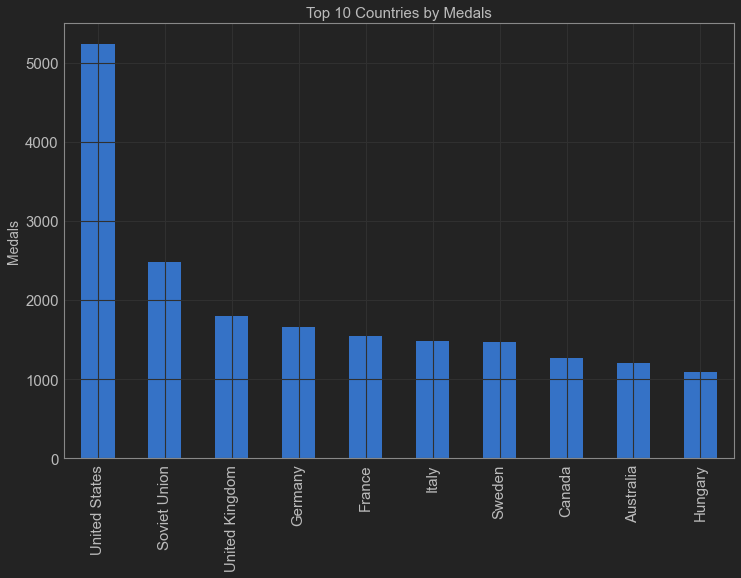

In [503]:
top_10.plot(kind = "bar", fontsize = 15, figsize = (12, 8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14);

In [504]:
olympics_10 = olympics[olympics['Country'].isin(top_10.index)]
olympics_10.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.543460
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States,321418820.0,56115.718426
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.543460
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States,321418820.0,56115.718426


In [505]:
olympics_10.shape

(19273, 13)

In [506]:
palette = sns.color_palette("Paired")
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

[Documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

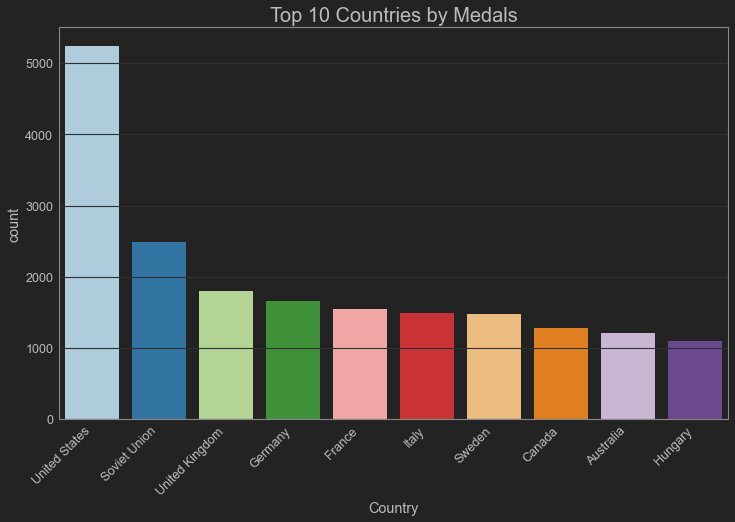

In [509]:
fig, ax = plt.subplots(figsize = (12, 8))


sns.countplot(data = olympics_10, x = "Country", ax = ax, order = top_10.index, palette = palette)
ax.set_title("Top 10 Countries by Medals", fontsize = 20)
fig.autofmt_xdate(rotation = 45);

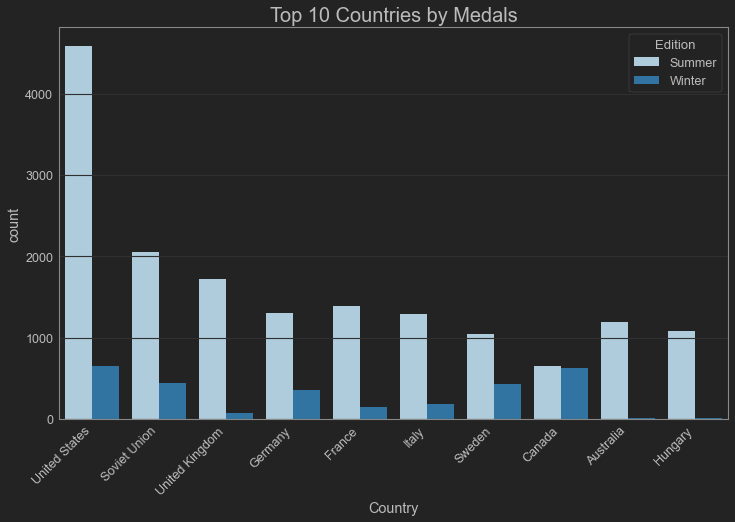

In [510]:
fig, ax = plt.subplots(figsize = (12, 8))


sns.countplot(data = olympics_10, x = "Country",
              hue = "Edition", order = top_10.index, ax = ax, palette = palette)
ax.set_title("Top 10 Countries by Medals", fontsize = 20)
fig.autofmt_xdate(rotation = 45);

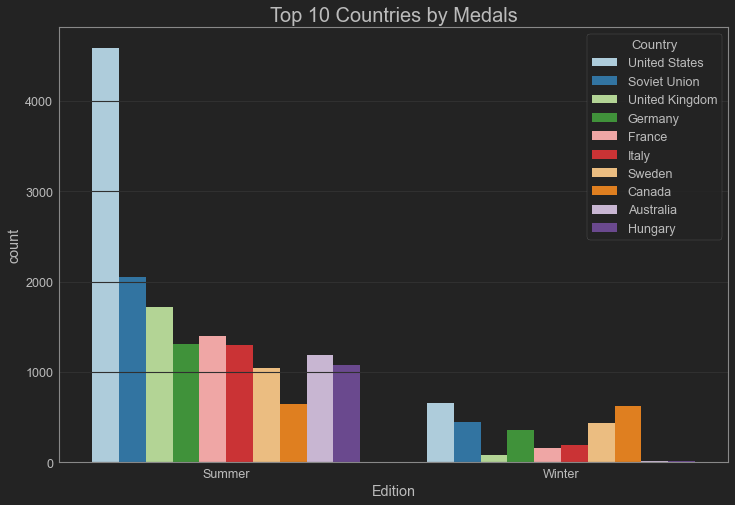

In [511]:
fig, ax = plt.subplots(figsize = (12, 8))


sns.countplot(data = olympics_10, x = "Edition", hue = 'Country',
              hue_order = top_10.index, ax = ax, palette = palette)
ax.set_title("Top 10 Countries by Medals", fontsize = 20);

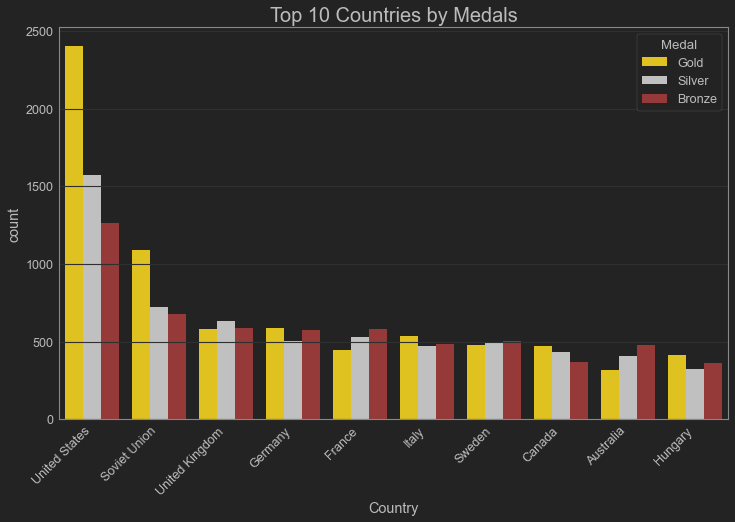

In [512]:
fig, ax = plt.subplots(figsize = (12, 8))


sns.countplot(data = olympics_10, x = "Country",
              hue = "Medal", order = top_10.index, hue_order = ['Gold', 'Silver', 'Bronze'],
              ax = ax, palette = ["gold", "silver", "brown"])
ax.set_title("Top 10 Countries by Medals", fontsize = 20)
fig.autofmt_xdate(rotation = 45);

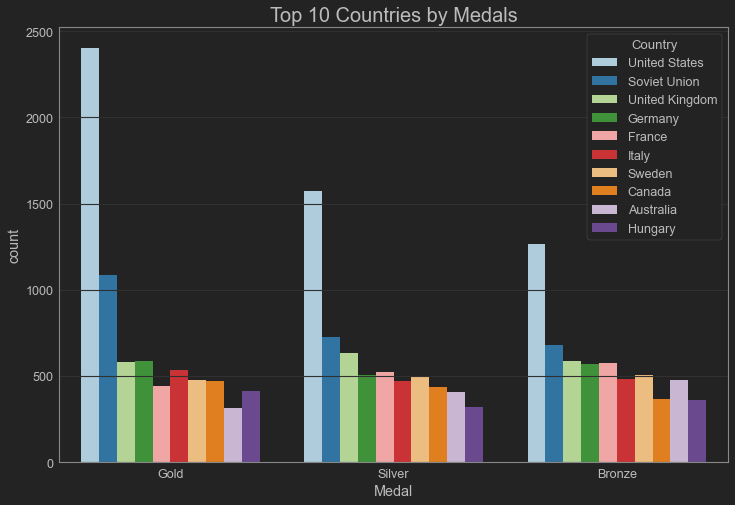

In [513]:
fig, ax = plt.subplots(figsize = (12, 8))


sns.countplot(data = olympics_10, x = "Medal",
              hue = "Country", hue_order = top_10.index, order = ['Gold', 'Silver', 'Bronze'],
              ax = ax, palette = palette)
ax.set_title("Top 10 Countries by Medals", fontsize = 20);